# Project 5: Visualizing Monetary Policy

In this lecture, we will review the [Federal Reserve's balance sheet](https://fred.stlouisfed.org/release/tables?rid=20&eid=840961#snid=840963) and review Fed activity in the overnight lending market, creating functions for visualizing relevant data in the process. We will  create a *plots.py* file class that will include some of the visualization functions from chapters 5 and 6, as well as some new visualizations that we will create in this lesson.

Let's get started by reviewing the classes and methods from the chapters. Make sure to save these in separate files using *Spyder*. Save them in a folder named *datlib*. This folder must be in the same directory as this notebook. We will import that folder (package). The name of the appropriate file is included just above the declaration of the class.

In [1]:
#plots.py
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def corr_matrix_heatmap(df, save_fig = False, pp = None):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(df, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = df.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(df.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " corrMatrix.png",
            bbox_inches = "tight")

        if pp != None: pp.savefig(fig, bbox_inches="tight")
    plt.close()

Now that we have saved these classes in *.py* files, we will import these files as to plot data from the [Federal Reserve](https://research.stlouisfed.org/). First, let's create a script name *FRED.py* that imports data from FRED using *pandas*.

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(self, data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

We have now saved all of the classes that will be included in the *datlib* package. Import the *datlib* and use the FRED module to download data from FRED. Let's start by gathering data reflecting the monetary base and currency in circulation.

In [3]:
#fedProject.py
from datlib.stats import *
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "MBCURRCIRW"}
# Select start and end dates
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "W")

In [4]:
data

,Base: Total,Base: Currency in Circulation
DATE,,
1975-01-12,108920.0,78943.0
1975-01-19,107891.0,78245.0
1975-01-26,107988.0,77505.0
1975-02-02,106358.0,76749.0
1975-02-09,106061.0,76530.0
1975-02-16,105693.0,77119.0
1975-02-23,105663.0,77358.0
1975-03-02,104951.0,77031.0
1975-03-09,104932.0,77087.0


We have not indicated what units of measurement for the variables indicated. It is necessary to keep track of the units of measurement for your variables. So far, we have gathered variables that are measured in billions. As we download other data from FRED, we will find that most data is saved in terms of millions or billions of dollars. We will want to standardize units so that all measurements are in millions. 

We will add the descrpitor "($ mil)" to all keys. 

Add the following function to convert units from billions to millions. We will create a function to transform units in the FRED.py file. Then we will create a list of variables to pass to that function. 

In [5]:
#FRED.py
#. . . 
def bil_to_mil(series):
    return series.mul(10**3)

In [6]:
#fedProject.py
# . . . 
data_codes  = {"Base: Total ($ Mil)": "BOGMBASEW",
               "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW"}
# . . . 
# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "W")
bil_to_mil_list  = ["Base: Total ($ Mil)",
               "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [7]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil)
DATE,,
1975-01-12,1.089200e+08,7.894300e+07
1975-01-19,1.078910e+08,7.824500e+07
1975-01-26,1.079880e+08,7.750500e+07
1975-02-02,1.063580e+08,7.674900e+07
1975-02-09,1.060610e+08,7.653000e+07
1975-02-16,1.056930e+08,7.711900e+07
1975-02-23,1.056630e+08,7.735800e+07
1975-03-02,1.049510e+08,7.703100e+07
1975-03-09,1.049320e+08,7.708700e+07


## Breaking down the Federal Reserve balance sheet

Now that we have an idea of how to gather and organize data from FRED, let's download data that reflects the balance sheet of the Federal Reserve.

Like any balance sheet, the Federal Reserves balance sheet is comprise of assets and liabilities. A bank holds assets that earn some return. For example, each month the Federal Reserve earns interest on Treasuries that it is holding. Liabilities on the balance sheet indicate cases where the Federal Reserve owes funds to holders of offsetting assets (except in the case of Federal Reserve Notes Outstanding). Some banks hold deposit accounts that hold excess reserves with the Federal Reserve. Likewise, the U.S. Treasury holds unspent funds in anaccount at the Federal Reserve. The Federal Reserve must repay these funds and often will pay interest on these accounts.

We will download many of the largest categories of the Fed's assets and liabilities and build functions to visualize them over time.

In [8]:
#fedProject.py
# . . .
data_codes  = {"Base: Total ($ Mil)": "BOGMBASEW",
               "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
               # Assets
               "Fed Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Fed Balance Sheet Securities, Premiums-Discounts, Repos, and Loans ($ Mil)": "WSRLL",
               "Fed Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Fed Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Fed Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Fed Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Fed Balance Sheet: Repos ($ Mil)": "WORAL",
               "Fed Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Fed Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Fed Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Fed Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Fed Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Fed Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               "Fed Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               ### Major share of deposits 
               "Fed Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Fed Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",

               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER"}
               
# Select start and end dates
start = datetime.datetime(2002, 12, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "W")
bil_to_mil_list  = ["Base: Total ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
#for key in bil_to_mil_list:
#    data[key] = FRED.bil_to_mil(data[key])

In [9]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Fed Balance Sheet: Total Assets ($ Mil),"Fed Balance Sheet Securities, Premiums-Discounts, Repos, and Loans ($ Mil)",Fed Balance Sheet: Securities Held Outright ($ Mil),Fed Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Fed Balance Sheet: Federal Agency Debt Securities ($ Mil),Fed Balance Sheet: Mortgage-Backed Securities ($ Mil),Fed Balance Sheet: Repos ($ Mil),Fed Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Fed Balance Sheet: Total Liabilities ($ Mil),Fed Balance Sheet: Federal Reserve Notes Outstanding ($ Mil),Fed Balance Sheet: Reverse Repos ($ Mil),Fed Balance Sheet: All Deposits ($ Mil),Fed Balance Sheet: Excess Reserves ($ Mil),Fed Balance Sheet: U.S. Treasury General Account ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves
DATE,,,,,,,,,,,,,,,,,,,,,
2002-12-08,694976.0,674442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1605.0,NaN,1.250000,NaN,1.230000,NaN
2002-12-15,694976.0,674442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1605.0,NaN,1.250000,NaN,1.252857,NaN
2002-12-22,700058.0,678503.0,719542.0,669223.0,629407.0,629397.0,10.0,0.0,30000.0,0.0,...,702053.0,645599.0,21905.0,24923.0,2482.0,6595.0,1.250000,NaN,1.275714,NaN
2002-12-29,700058.0,678503.0,732059.0,676466.0,629412.0,629402.0,10.0,0.0,37250.0,0.0,...,713850.0,651891.0,20396.0,29704.0,2482.0,4662.0,1.250000,NaN,1.208571,NaN
2003-01-05,705024.0,684954.0,730994.0,678665.0,629416.0,629406.0,10.0,0.0,39500.0,0.0,...,714234.0,654272.0,21091.0,28249.0,1640.0,4420.0,1.250000,NaN,1.172857,NaN
2003-01-12,705024.0,684954.0,723762.0,672872.0,629416.0,629406.0,10.0,0.0,33750.0,0.0,...,706601.0,647070.0,18709.0,31135.0,1640.0,5490.0,1.250000,NaN,1.250000,NaN
2003-01-19,698187.0,676184.0,720074.0,669094.0,629416.0,629406.0,10.0,0.0,30000.0,0.0,...,702678.0,642887.0,17813.0,32648.0,1829.0,5192.0,1.250000,NaN,1.234286,NaN
2003-01-26,698187.0,676184.0,735953.0,675815.0,629416.0,629406.0,10.0,0.0,36750.0,0.0,...,718618.0,643281.0,18523.0,44098.0,1829.0,6119.0,1.250000,NaN,1.238571,NaN
2003-02-02,695812.0,675280.0,712809.0,659535.0,629416.0,629406.0,10.0,0.0,20500.0,0.0,...,695476.0,642604.0,18466.0,25671.0,1580.0,7030.0,1.250000,NaN,1.295714,NaN


Whenever the Federal Reserve acaquires an asset, it must also acquire a liability. For much of the history of central banking, an increase in assets was enabled by the creation and distribution of base money. If the central bank provides a loan or purchases an existing debt instrument, new base money would enter circulation. Or, the money might support interbank, overnight lending, in which case, the ability of monetary expansion to postively affect the volume of circulating cash is, under normal circumatances, limited. 

Our breakdown of the Federal Reserve's balance sheet will navigate the distinction between 

1. the portion of the monetary base supporting lending within the economy
2. the portion of the monetary base deposited at the Federal Reserve
3. assets and liabilities that influence the level of overnight lending but are explicitly *not* counted as part of the monetary base.

The remaining portion of the liabilities represents less than 1 percent of the total value of its liabilities.

We will break down the balance sheet into its different components and then will reconstruct it in whole.

First, let's build a function to plot lines and save that function in *plots.py*. We will build this function one bit at a time.

In [10]:
#plots.py
# . . .
def plot_lines(df, linewidth = 1, figsize = (40,20), pp = None):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([int(x) for x in vals]) 
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    plt.savefig(filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

Let's call the function. First, let's plot all of the variables associated with the balance sheet.

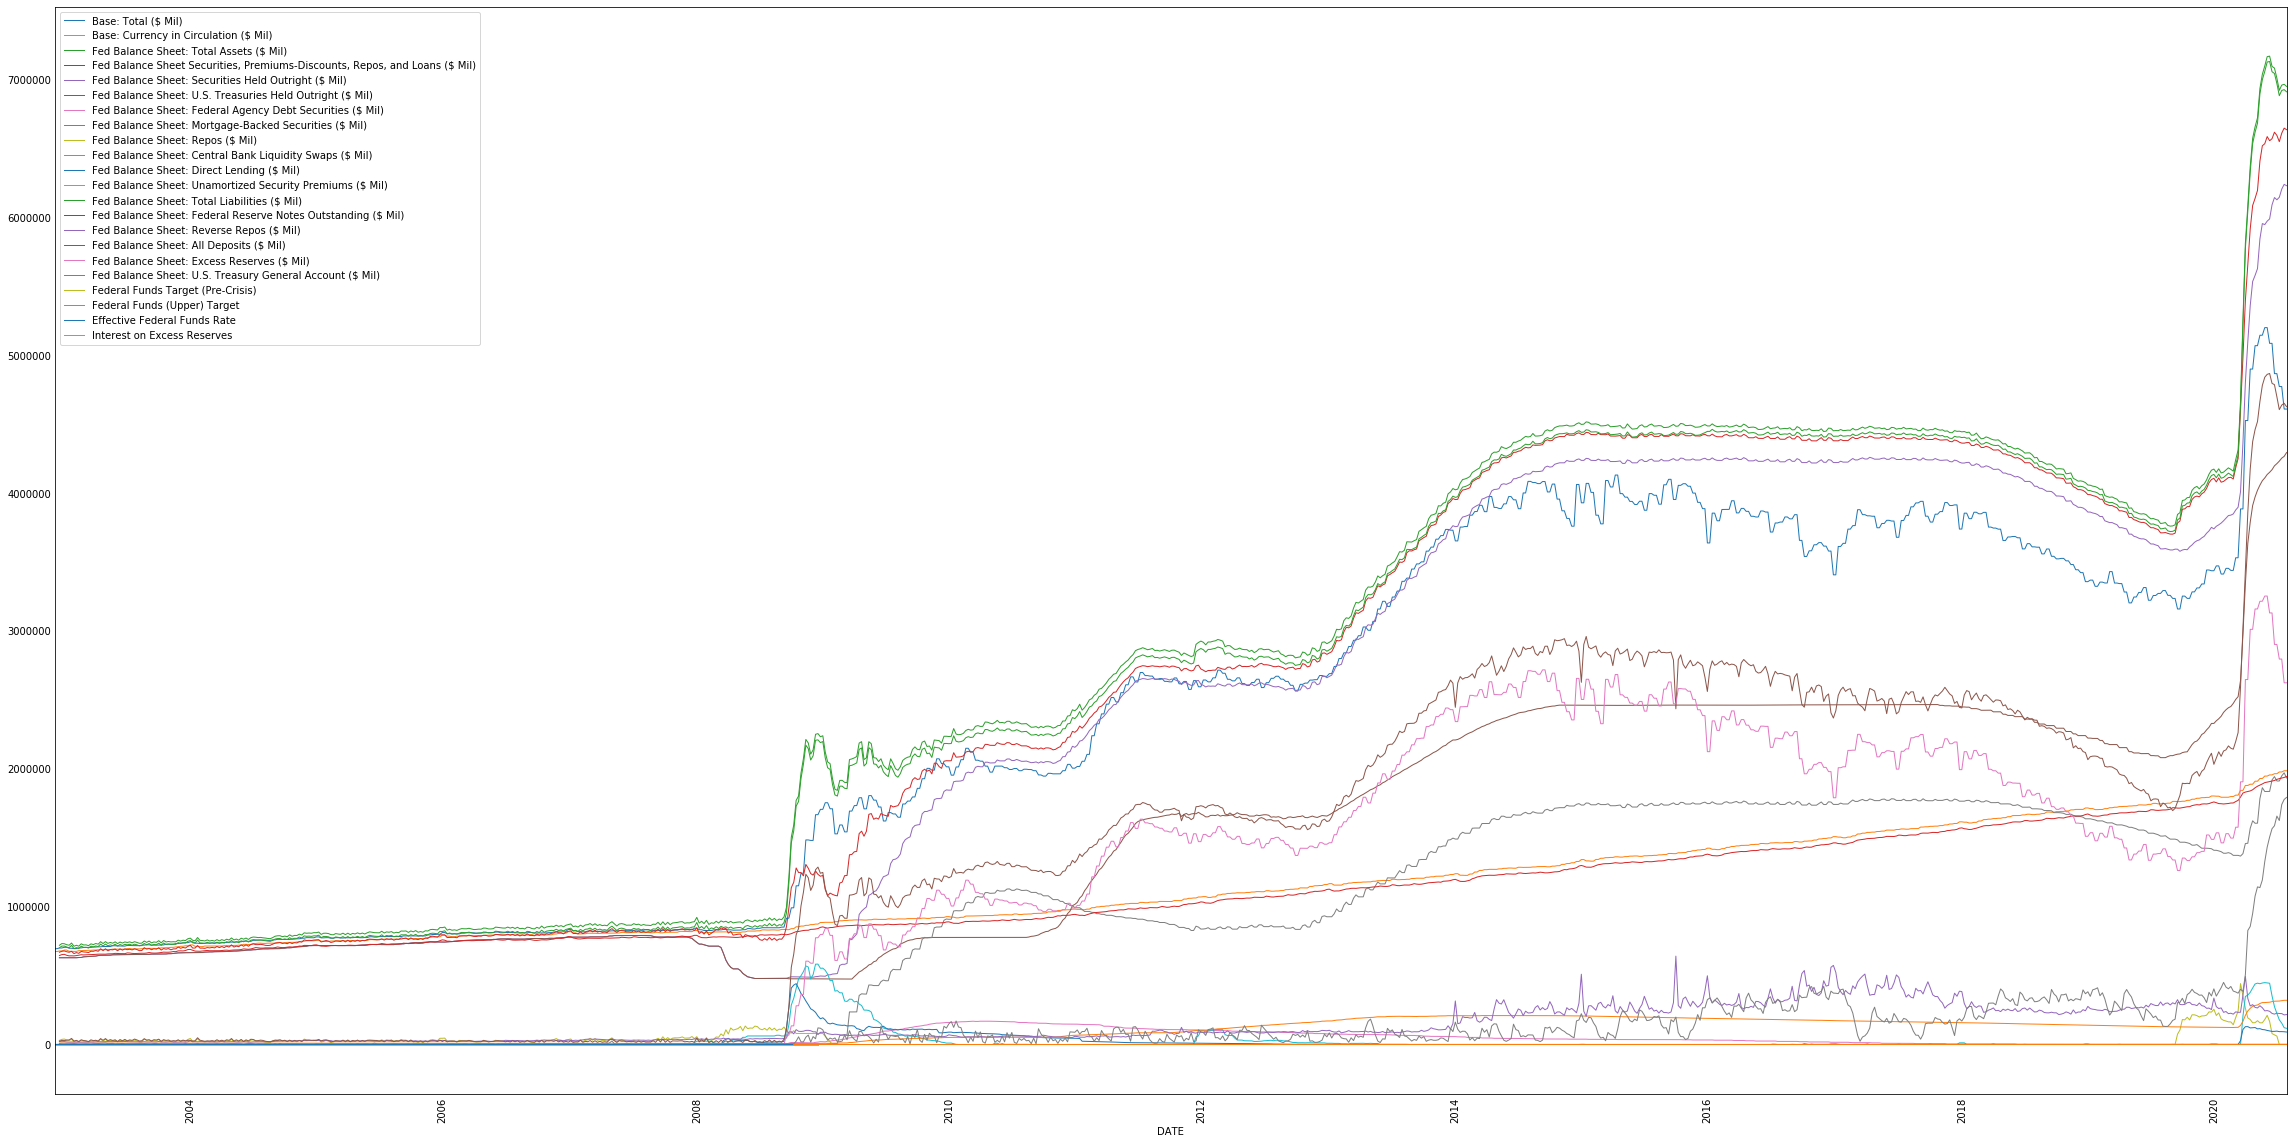

In [11]:
#fedProject.py
#. . . 
plot_lines(df = data, linewidth = 1, figsize = (40, 20), pp = None)

We've plotted all assets and liabilities together. The result is a visualization that is not easy to interpret. Further, there are numerous categories to evaluate. Axis and legend text are too small to read without squinting. 

Let's remedy these problems by concentrating on only a few variables related to the monetary base and increas the size of the text.

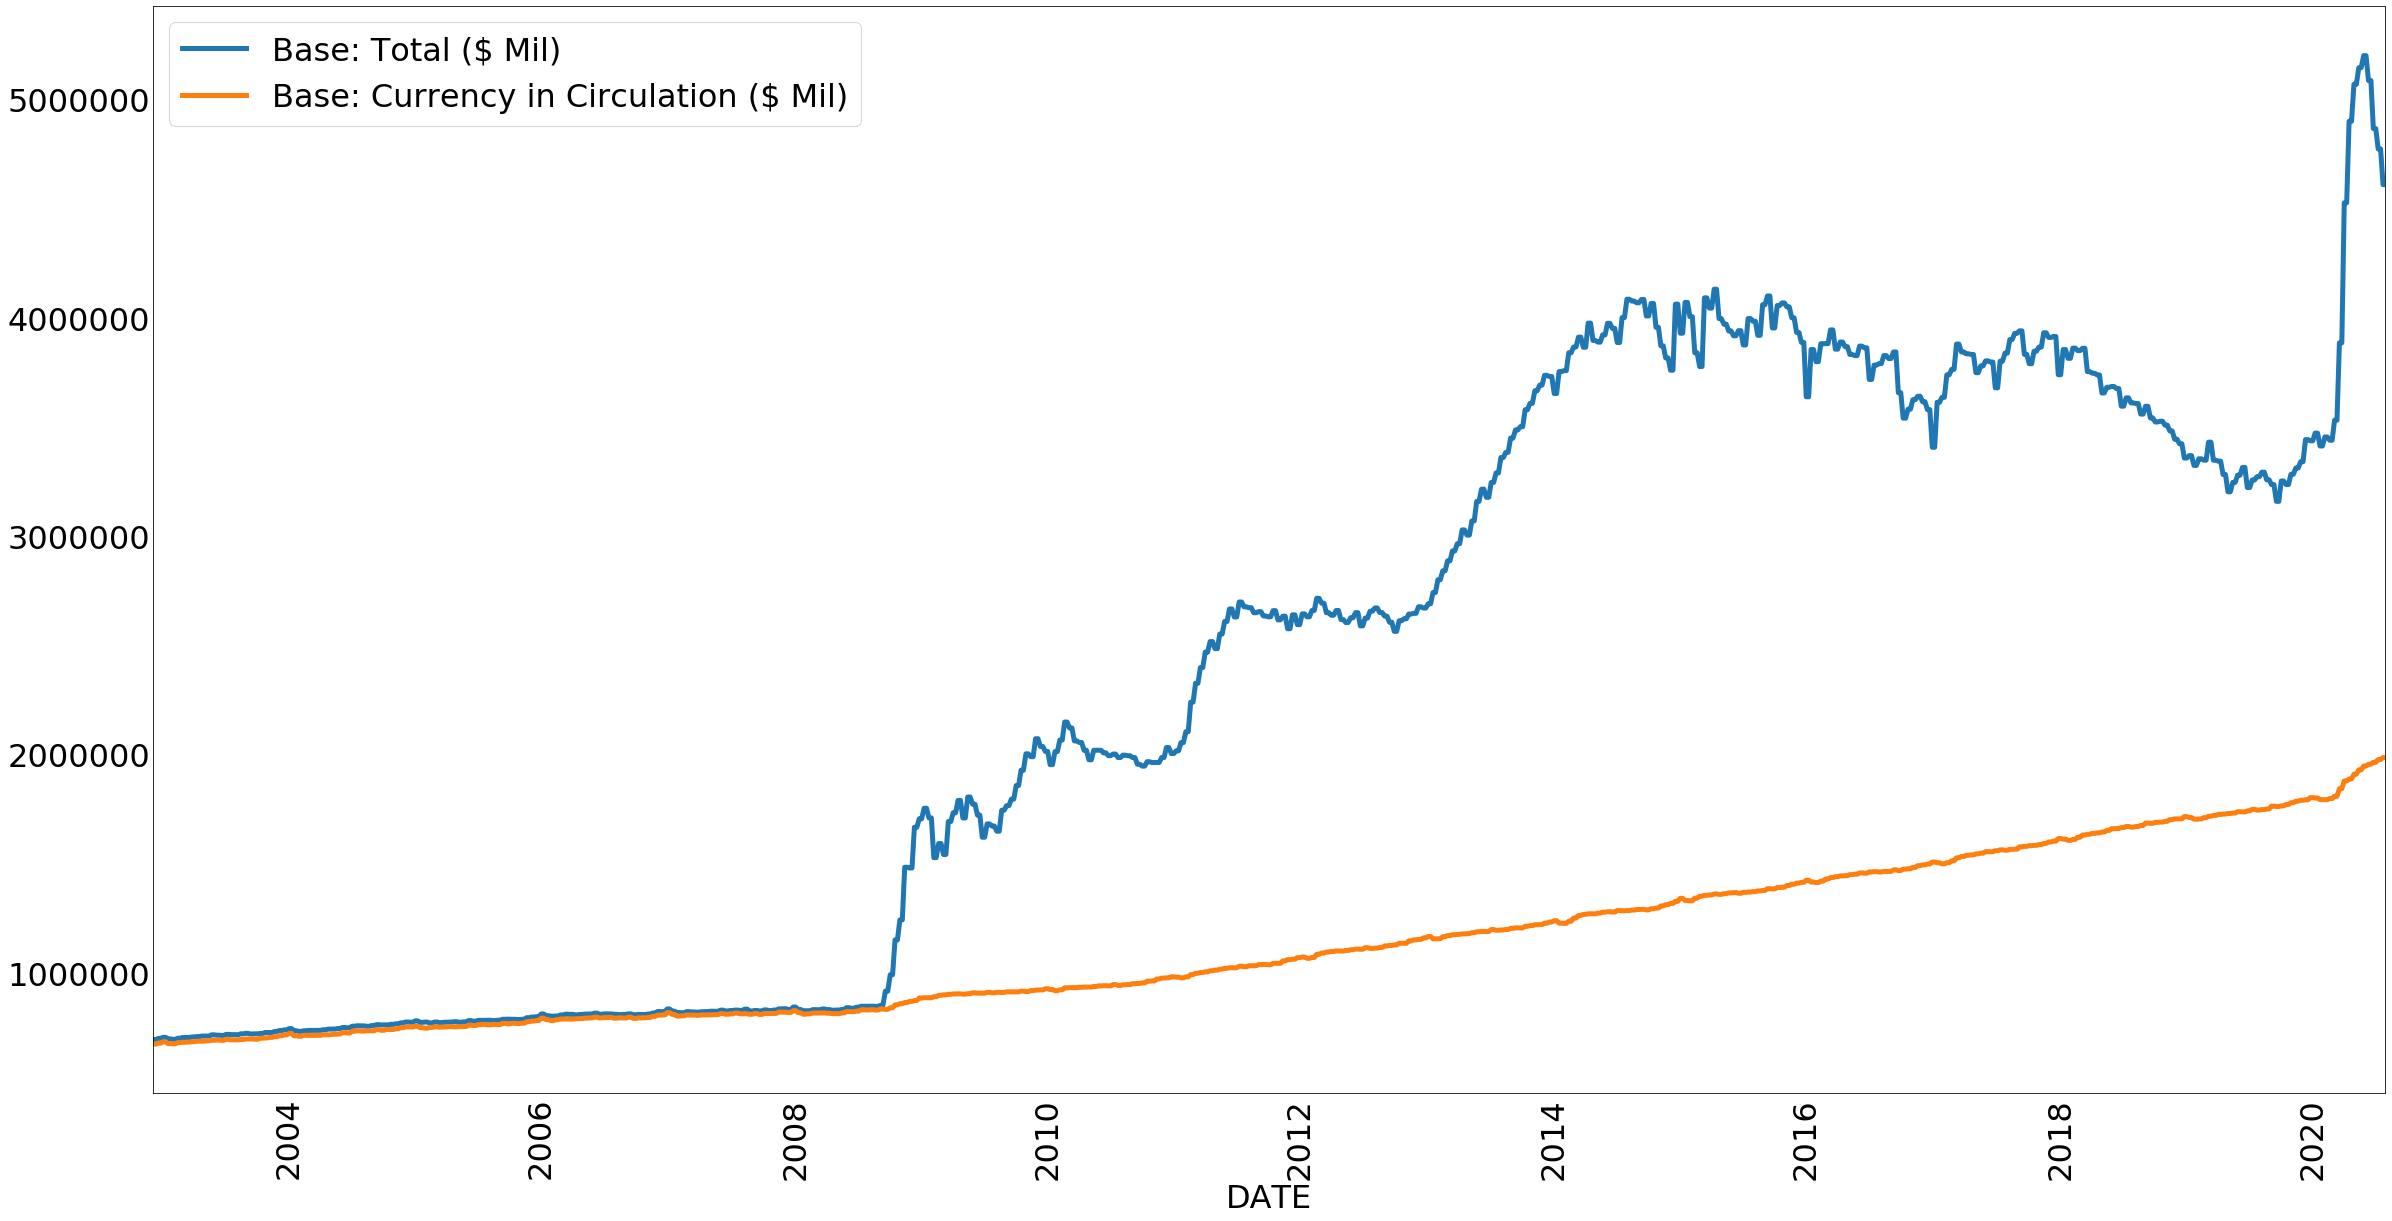

In [12]:
#fedProject.py
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

### Monetary base

The total monetary base can be described in terms of its support of lending within the economy.  The remainder of the base is held at the Federal Reserve without supporting additional lending. We will plot the total quantity of base money, and then break down this amount between base money that is and is not deposited at the Federal Reserve. We will observe that a radical change in monetary policy in 2008 led to an unprecedented increase in the portion of the base deposited at the Federal Reserve. 

From the plot, we observe that, before 2008, nearly the entire stock of base money was in circulation. After 2008, it is common for much, if not most, of the base to lie outside of circulation. In essence, the Federal Reserve borrows money from banks, paying them a risk free rate of interest. If we add a 3rd variable to the visualization, we can identify a significant portion of the stock of base money not in circulation as excess reserves.

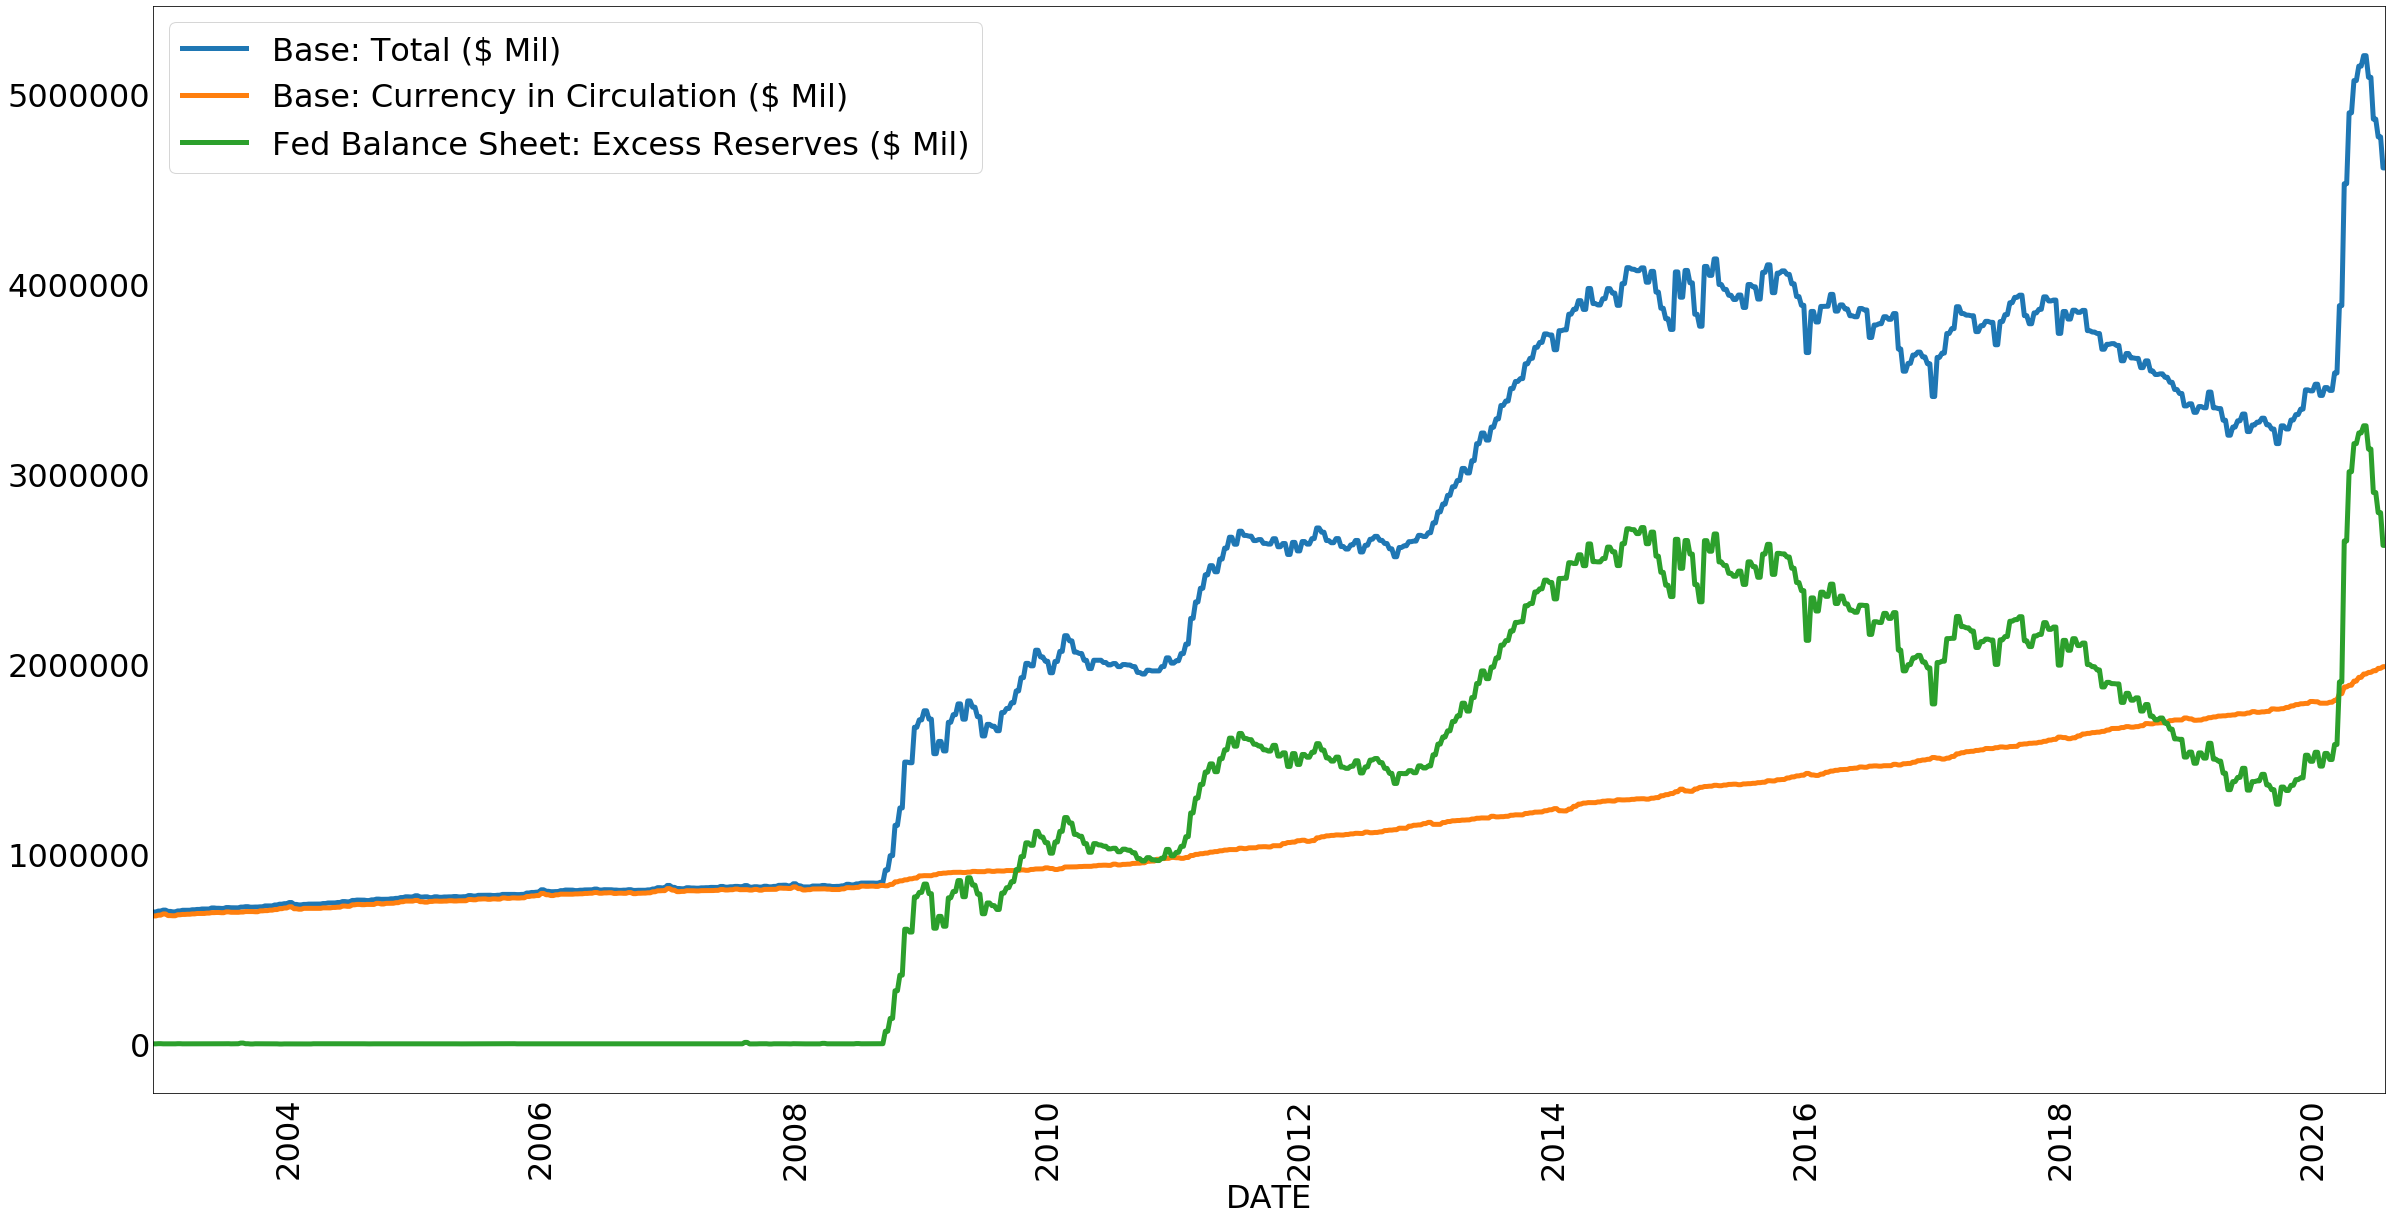

In [13]:
#fedProject.py
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Fed Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

### Stacking Lines 
It would be useful if we could view these components as portions of the total stock of base money. To accomplish this, we need to create a new function in plots. This function will stack the values plotted instead of plotting the values independent of one another.

In [14]:
#plots.py
# . . .
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
#    mpl_colors = ["C" + str(i) for i in range(11)]
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k",
              label = total_var, ls = "--")
    ax.legend(loc=2, ncol = 2)

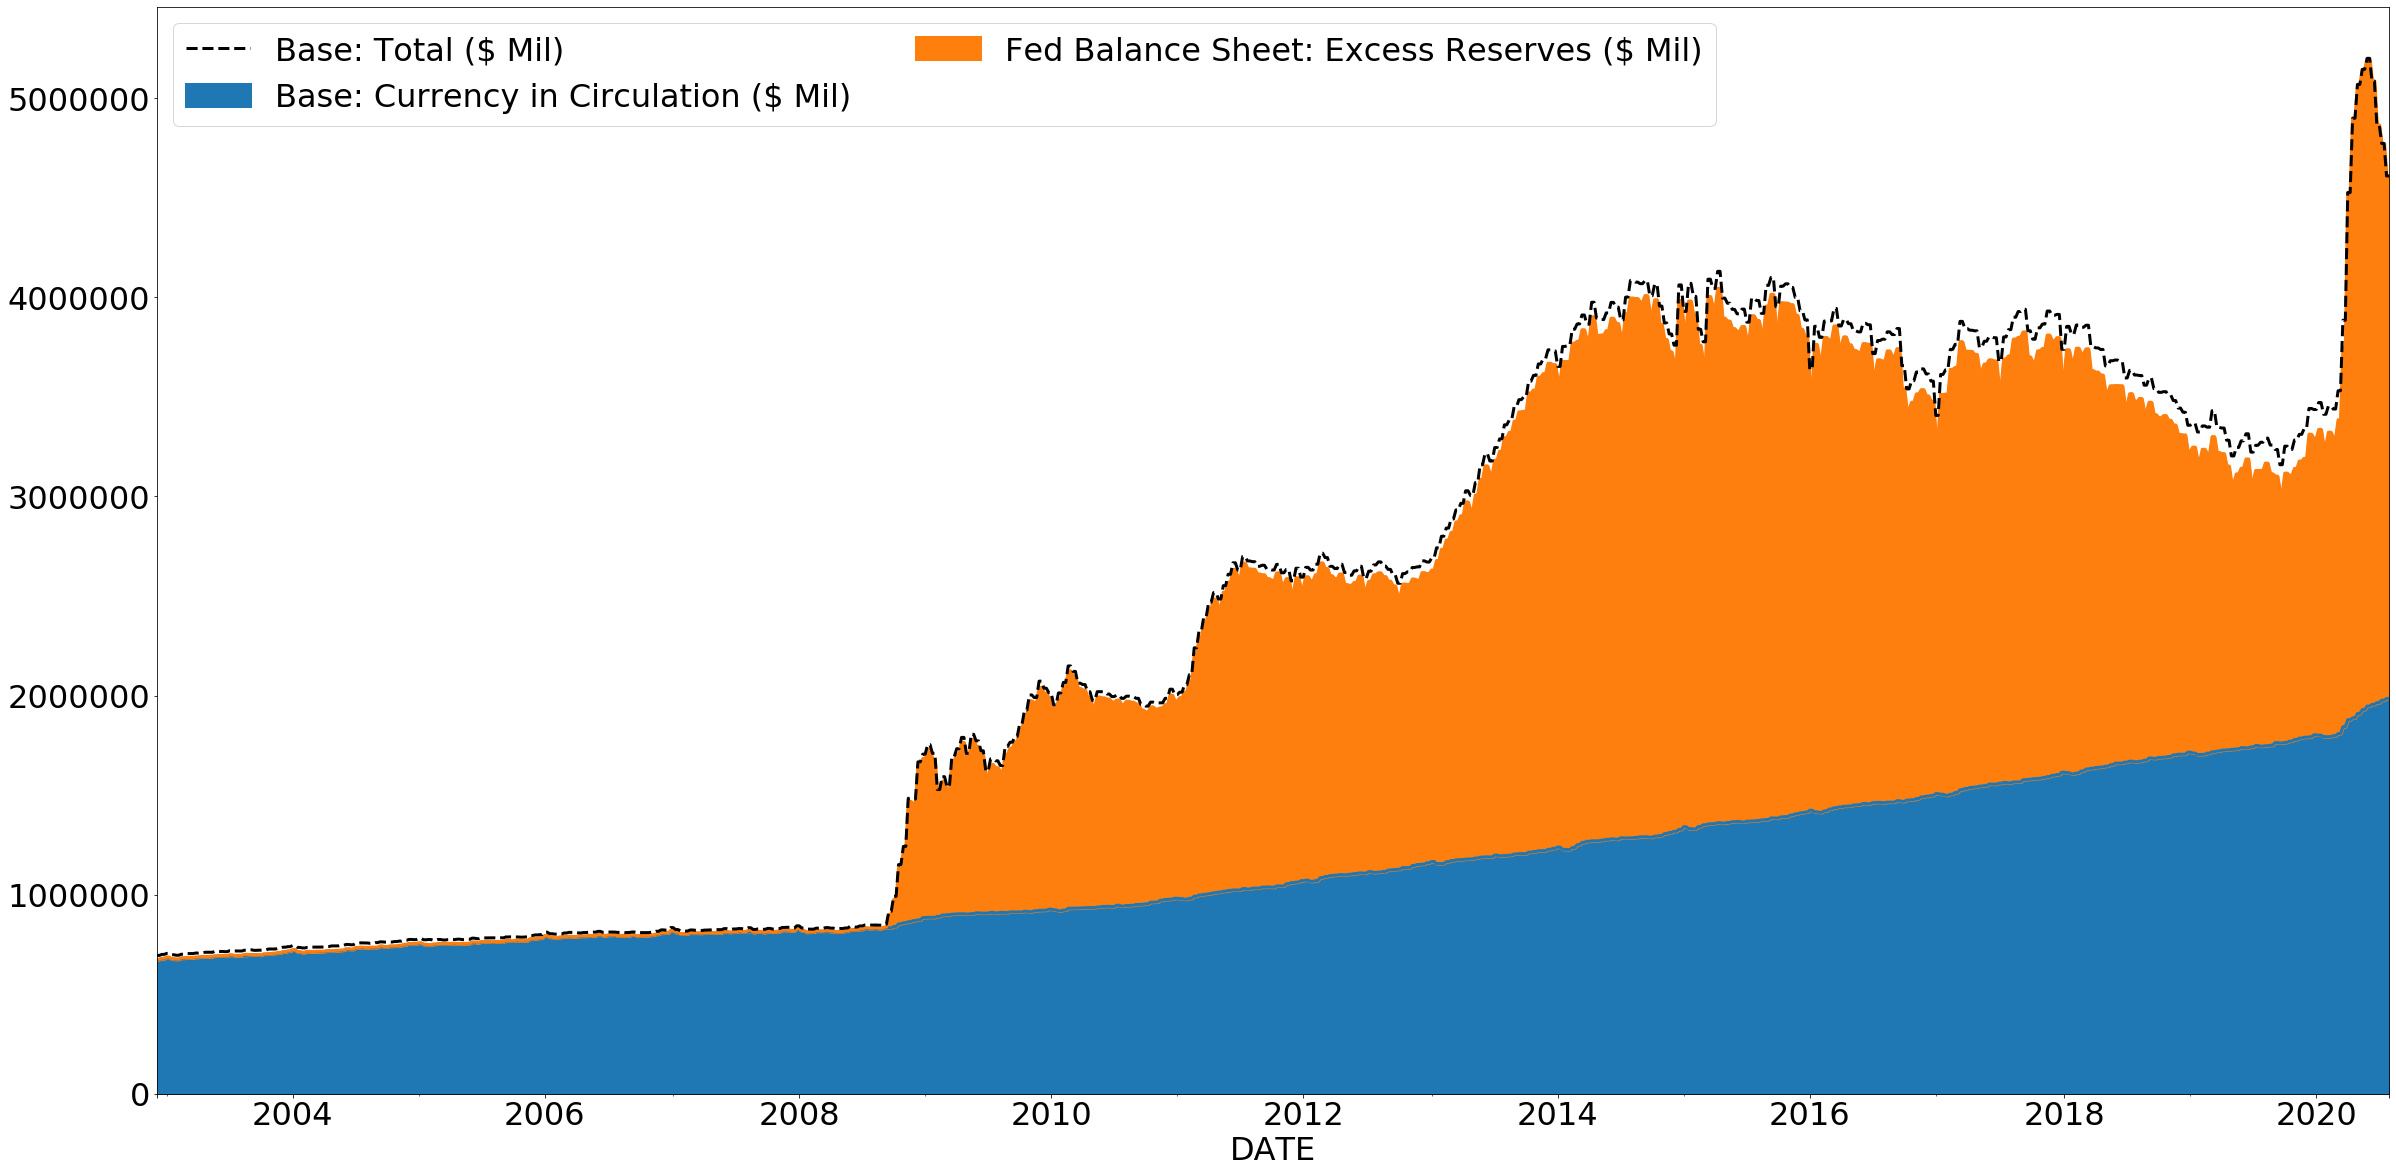

In [15]:
#fedProject
# . . . 
money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Fed Balance Sheet: Excess Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

We can see that the monetary base is almost entirely divided between currency in circulation and money deposited on account as excess reserves at the Fed. There is a lot going on beneath the surface of these measures. To get a better idea of how monetary policy works, let's work through the major components of the Federal Reserve's balance sheet.
## Assets Held by the Federal Reserve

Like any bank, the Federal Reserve not only takes deposits. It invests in interest bearing assets. For most of the Fed's history, these investments were predominantly, if not wholly, comprised of U.S. Treasuries - i.e., loans to the federal government. The Federal Reserve greatly expanded operations after 2008. It began investing in mortgage backed securities and lending to private banks, holding debt from federal agencies as well as to central banks in other countries with central bank liquidity swaps. All of these can be thought of as influencing the total stock of base money. In addition to these, the Federal Reserve also lends in the overnight lending market using repurchase agreements (repos). We will explain this last category later in the lesson.

Let's observe the change in the structure of security holdings from the Federal Reserve.

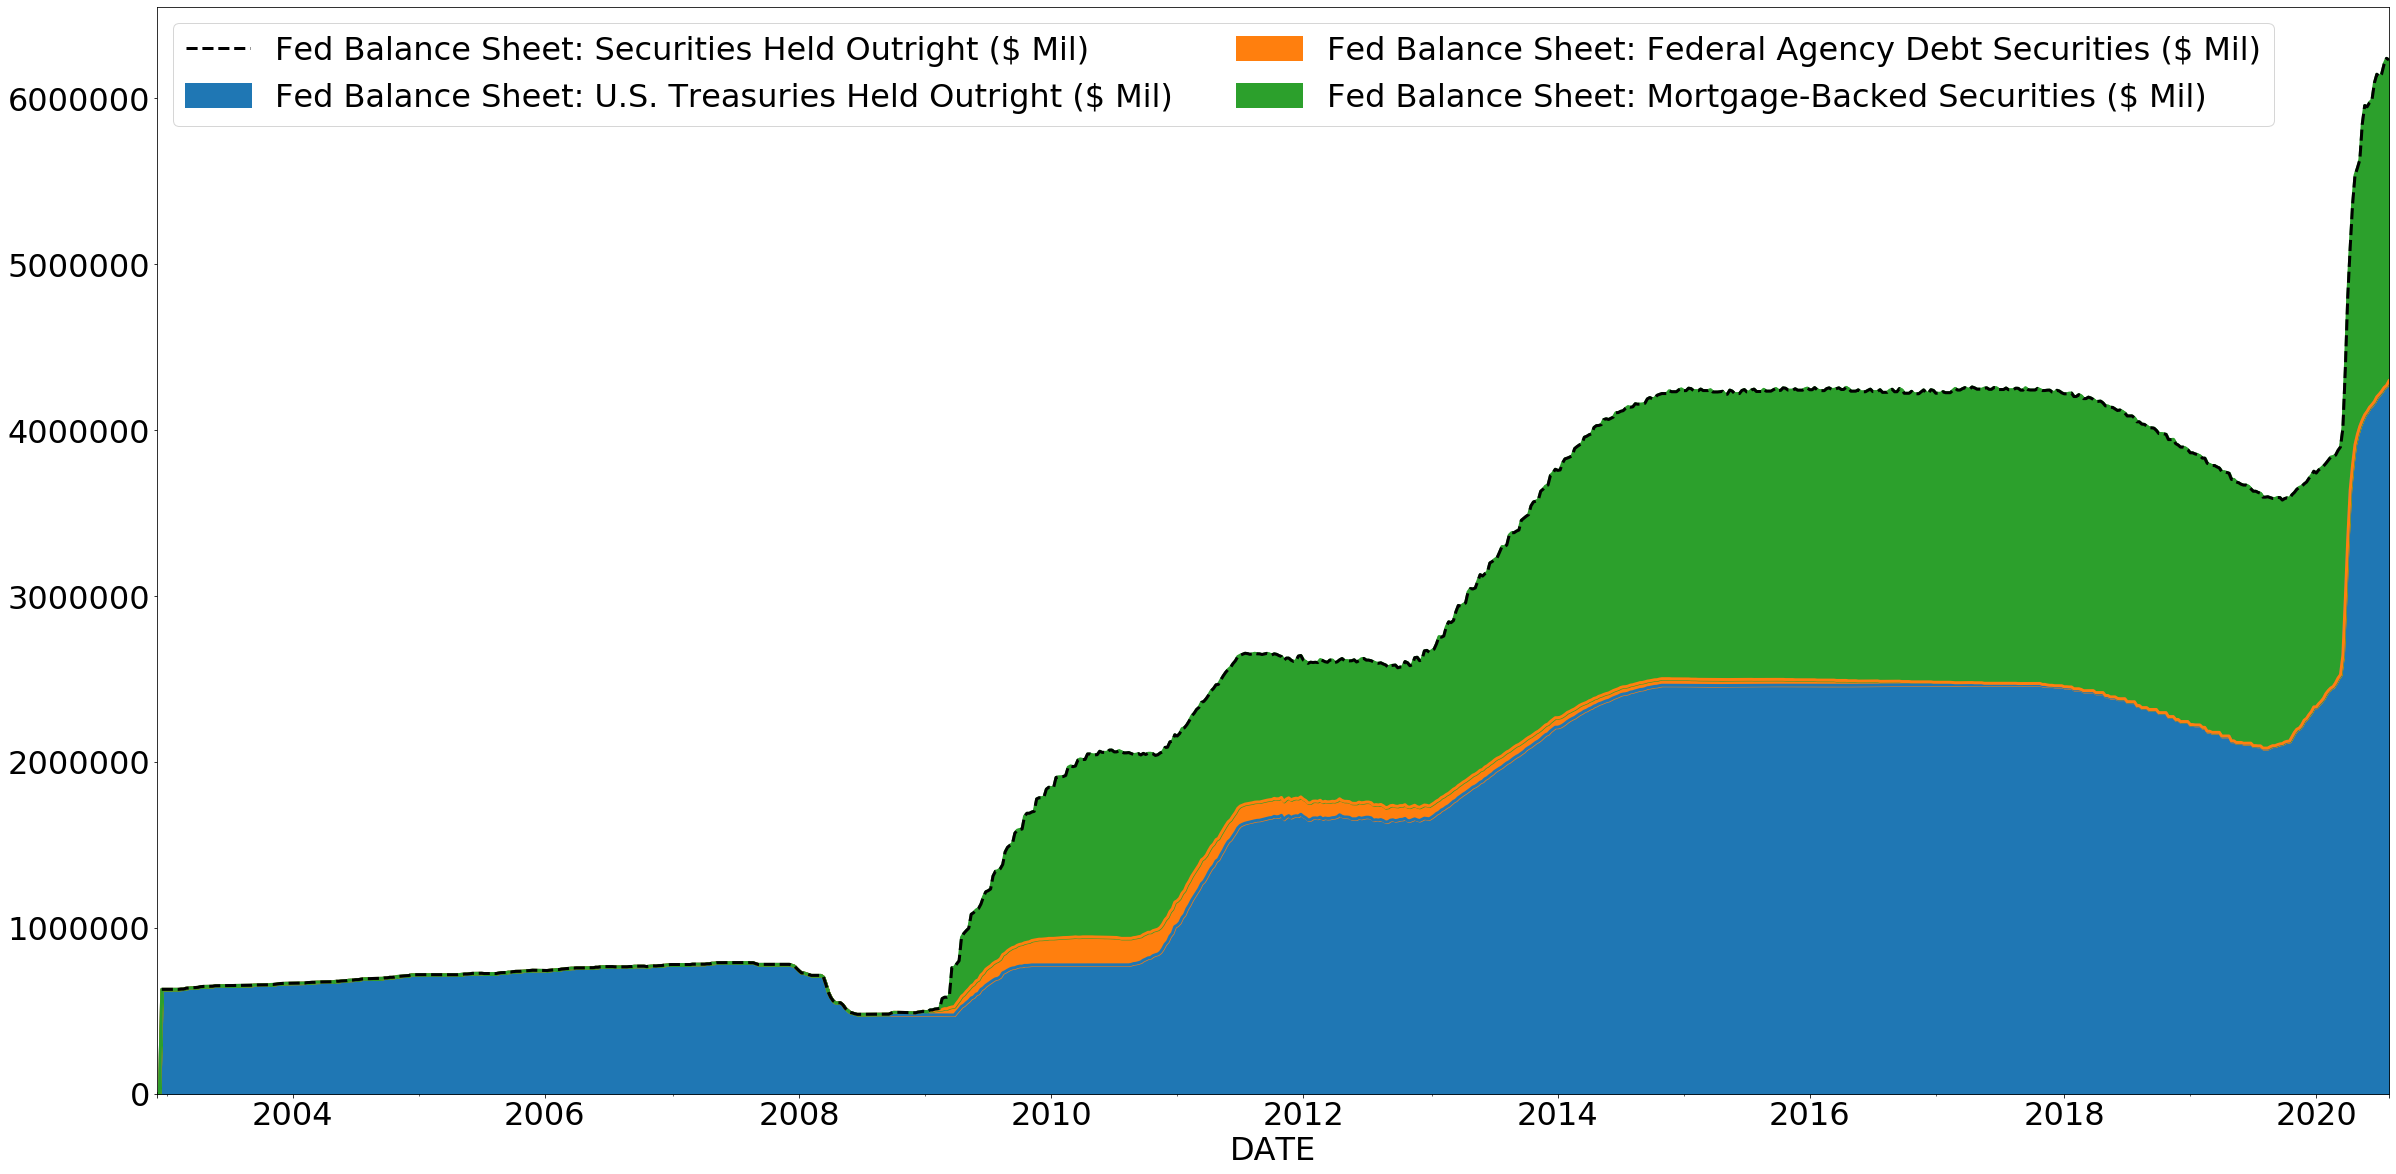

In [16]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Fed Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Fed Balance Sheet: Mortgage-Backed Securities ($ Mil)"]

# these three subcomponents comprise the value of securities held outright in its entirety. To more distinctly show
# the total value of securities held by the Fed, increase linewidth.
plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Fed Balance Sheet: Securities Held Outright ($ Mil)")


The mix of assets held by the Federal Reserve indicates the particular markets that it supports relative to those markets that do not receive direct support. From the data, it is clear that the Federal Reserve provides significant support for 1) federal borrowing and 2) mortgage markets, or in other words, real estate. Interest rates in both markets have remained relatively low. 

One obvious result of 1) is that the federal government has increased it's level of borrowing as a proportion of nominal income. The level of presnet taxation as a percent of GDP has fallen. As rates on federal debt have falllen, the cost of federal borrowing has fallen. 

<img src="https://github.com/jlcatonjr/Learn-Python-for-Stats-and-Econ/blob/master/In%20Class%20Projects/Federal%20Taxes%20and%20Debt%20to%20GDP.png?raw=true" alt="" title="" />
<h3><center></center></h3>


Since we know the composition of Securities Held Outright, It will be convenient to reference this aggregate value when representing the rest of the asset side of the Fed's balance sheet. 

Let's include some of the values referenced earlier.

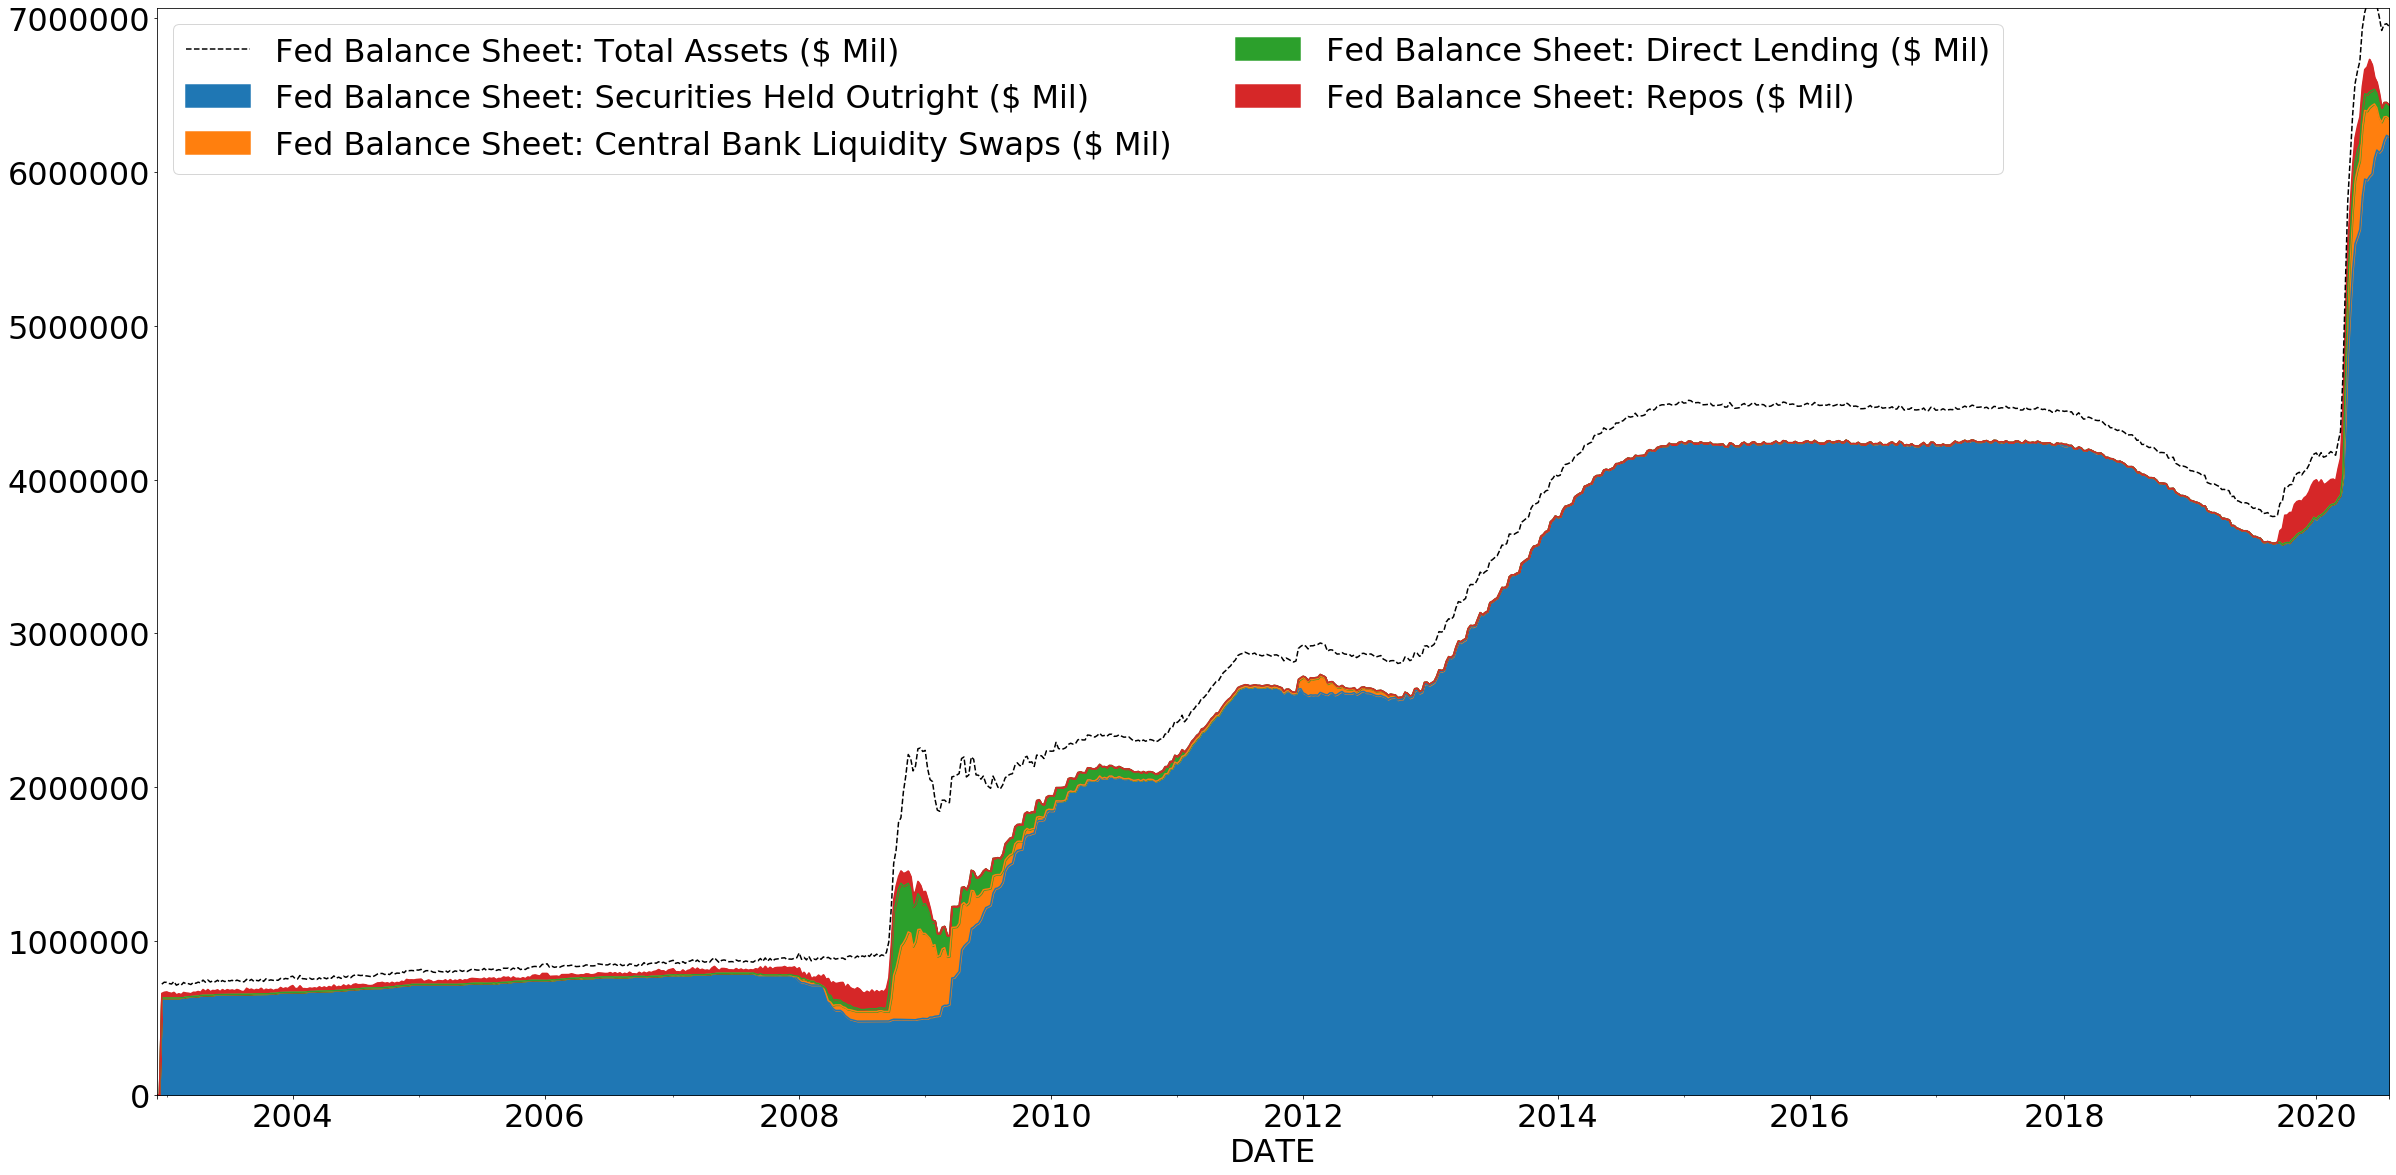

In [17]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet: Securities Held Outright ($ Mil)",
               "Fed Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Fed Balance Sheet: Direct Lending ($ Mil)",
               "Fed Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Fed Balance Sheet: Total Assets ($ Mil)")



Although a portion of the balance sheet remains un explained, it is clear that the Federal Reserve predominantly purchases securities. A fair share of the remaining value of the balance sheet exists as unamortized changes(usuall increases) in the value of securities already held by the Federal Reserve. (I leave the  value of discounts as it is miniscule in comparison.) Let's add this last variable to see how much of the Fed's assets remains undescribed by these variables.

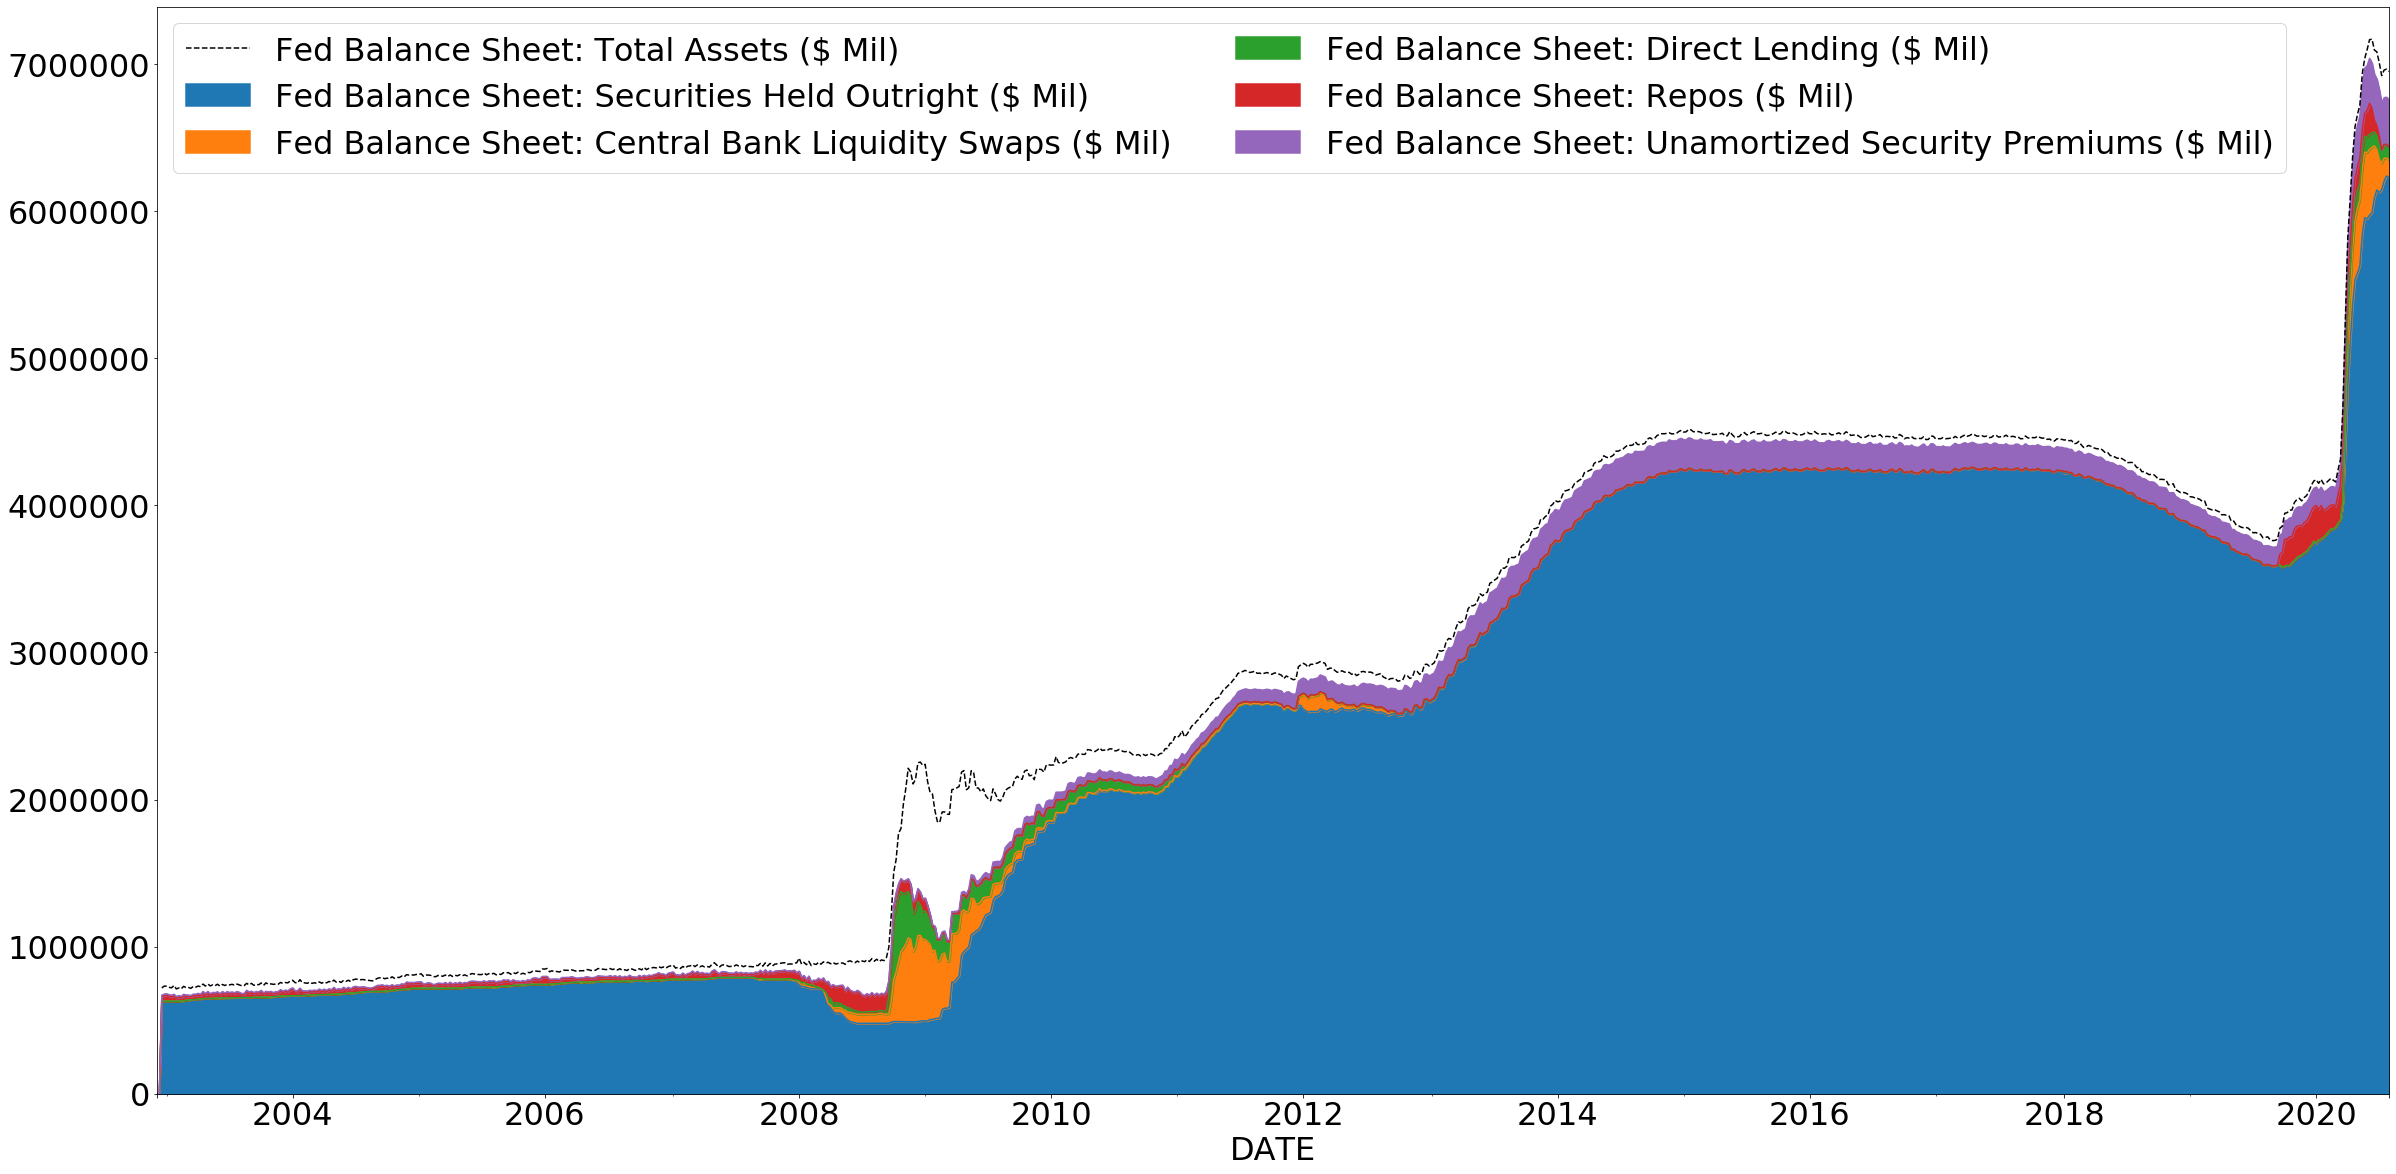

In [18]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet: Securities Held Outright ($ Mil)",
               "Fed Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Fed Balance Sheet: Direct Lending ($ Mil)",
               "Fed Balance Sheet: Repos ($ Mil)",
               "Fed Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Fed Balance Sheet: Total Assets ($ Mil)")

Except for the crisis period, most of the balance sheet is explained by these five variables. Let's consolidate them into a single category that includes a few other modest categories for which we have not so far accounted.* There is still a small portion of the balance sheet unexplained during the Crisis era, but even with this included, we have explained most of the changes occuring on the asset side of the Fed's balance sheet. 

\**These include Net Portfolio Holdings of Commercial Paper Funding Facility II LLC, Items in Process of Collection, Bank Premises, Foreign Currency Denominated Assets, and Other Assets).* 

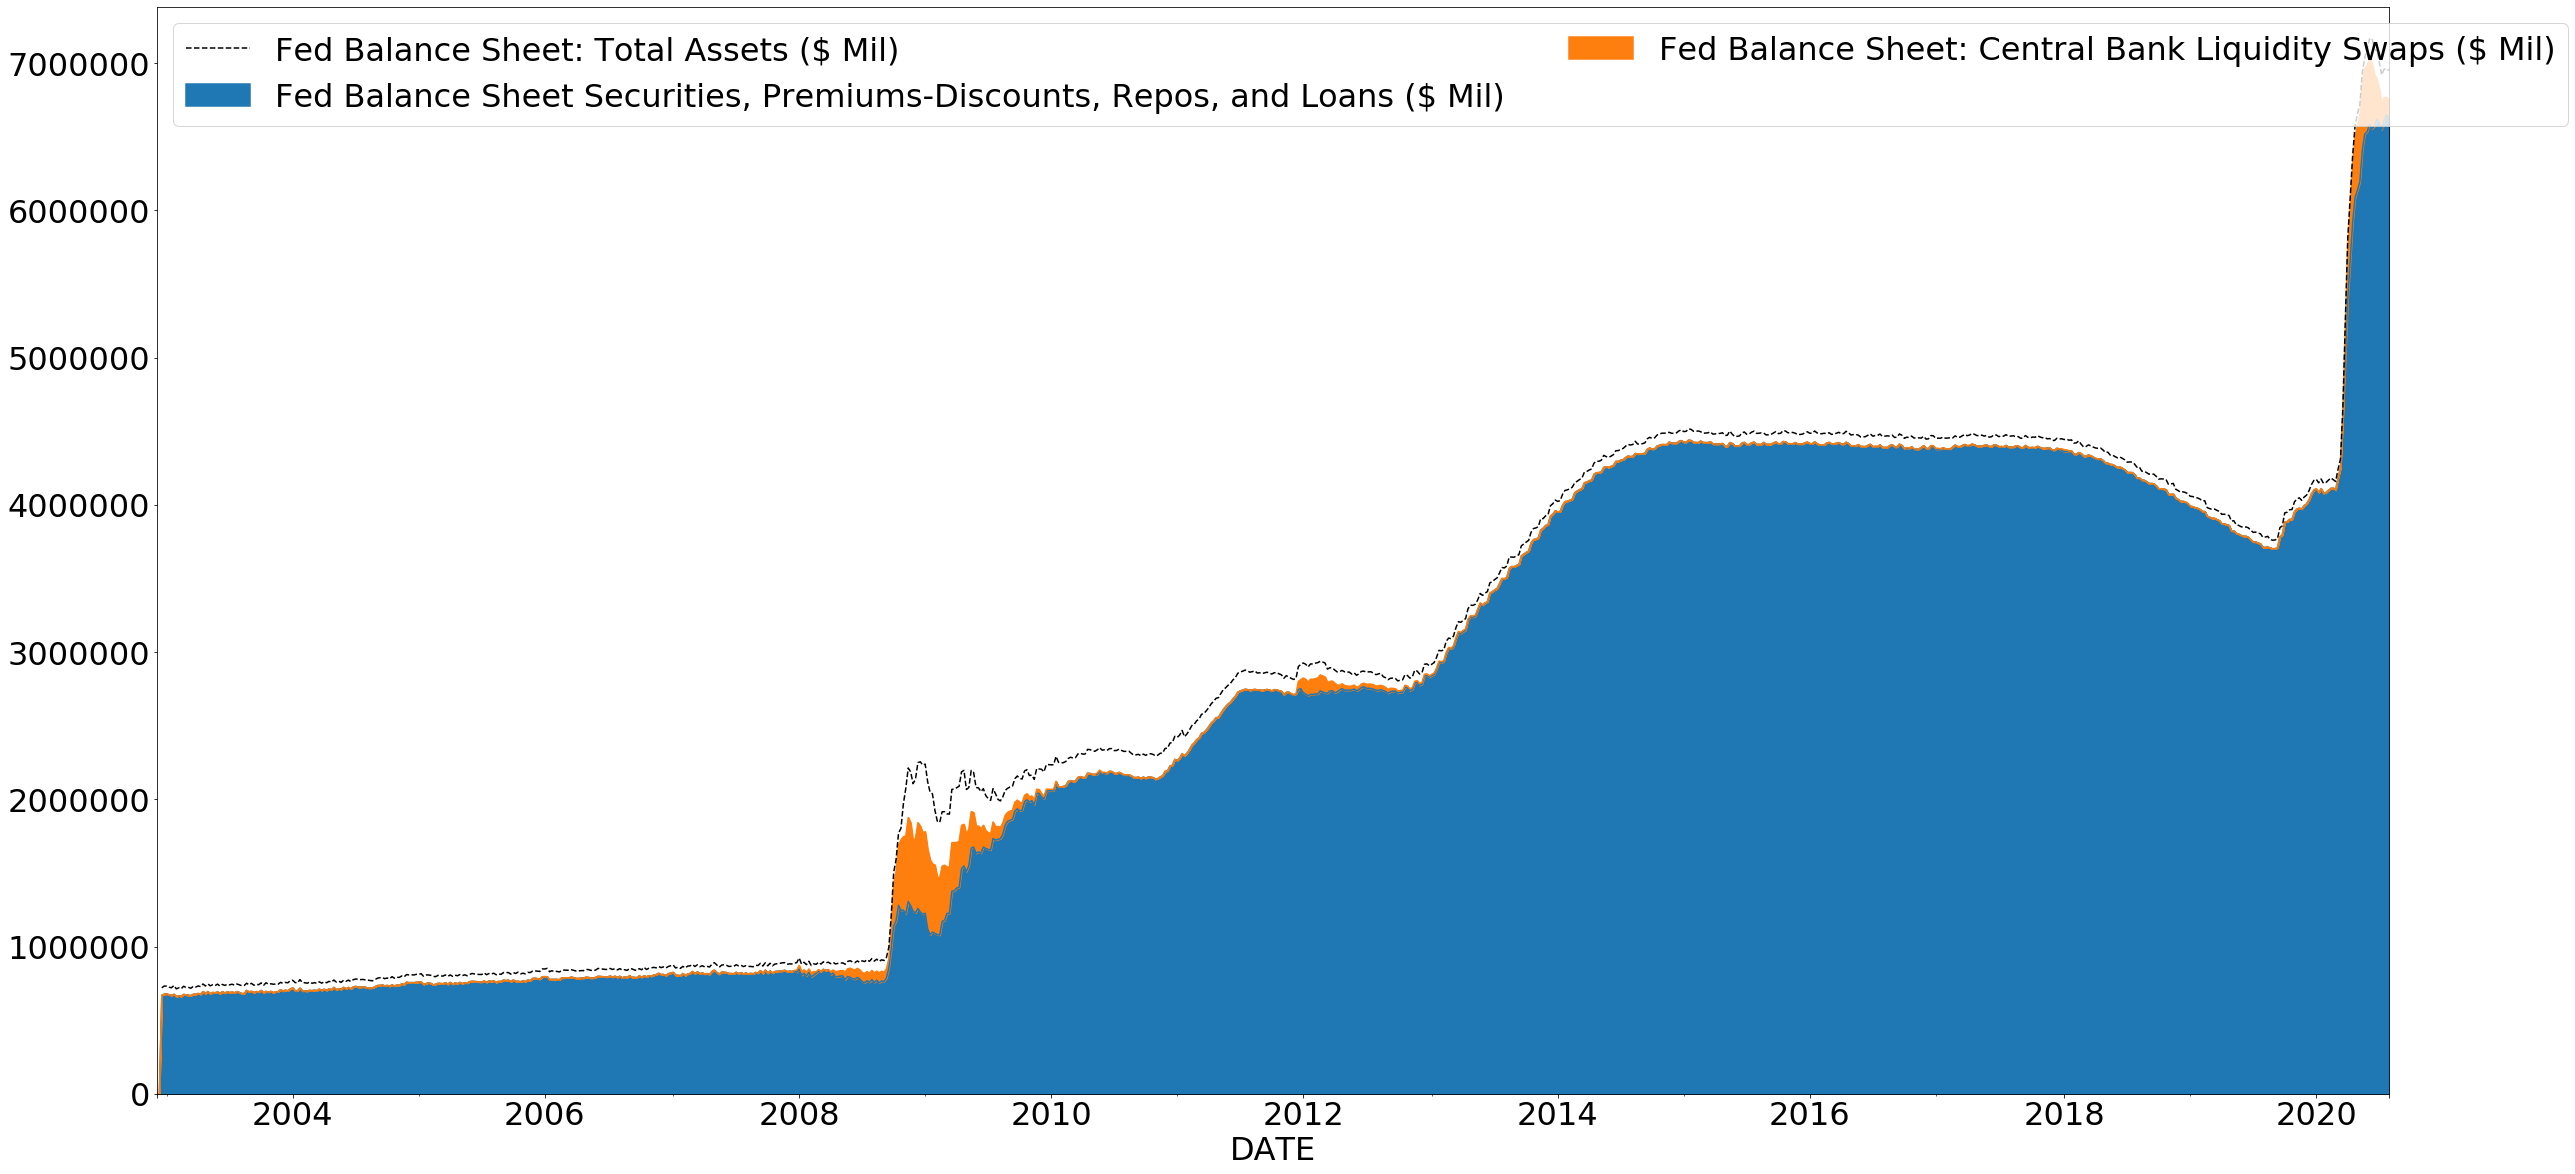

In [19]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet Securities, Premiums-Discounts, Repos, and Loans ($ Mil)",
                "Fed Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Fed Balance Sheet: Total Assets ($ Mil)")


## Deposits at the Federal Reserve

Returning to our earlier discussion of the monetary base and excess reserves, we can think of excess reserves as comprising part of the Federal Reserve's liabilities. But what exactly are excess reserves? Banks have required reserves, or at least they did before the recent COVID-19 measures that reduced required reserves to zero. Parties that hold excess reserves at the Federal Reserve earn a risk free rate of interest on those deposits. So when we talk about excess reserves, we are talking about deposits at the Federal Reserve that earn interest.

There are two major sources of deposits at the Fed. Deposits of financial institutions are largely represented by excess reserves data. The U.S. Treasury, the body that facilitates expenditures by the federal government, also holds a deposit account at the Federal Reserve.  Instead of adding excess reserves and currency in circulation, we can add together excess reserves and the U.S. Treasury General Account that is held at the Fed. 

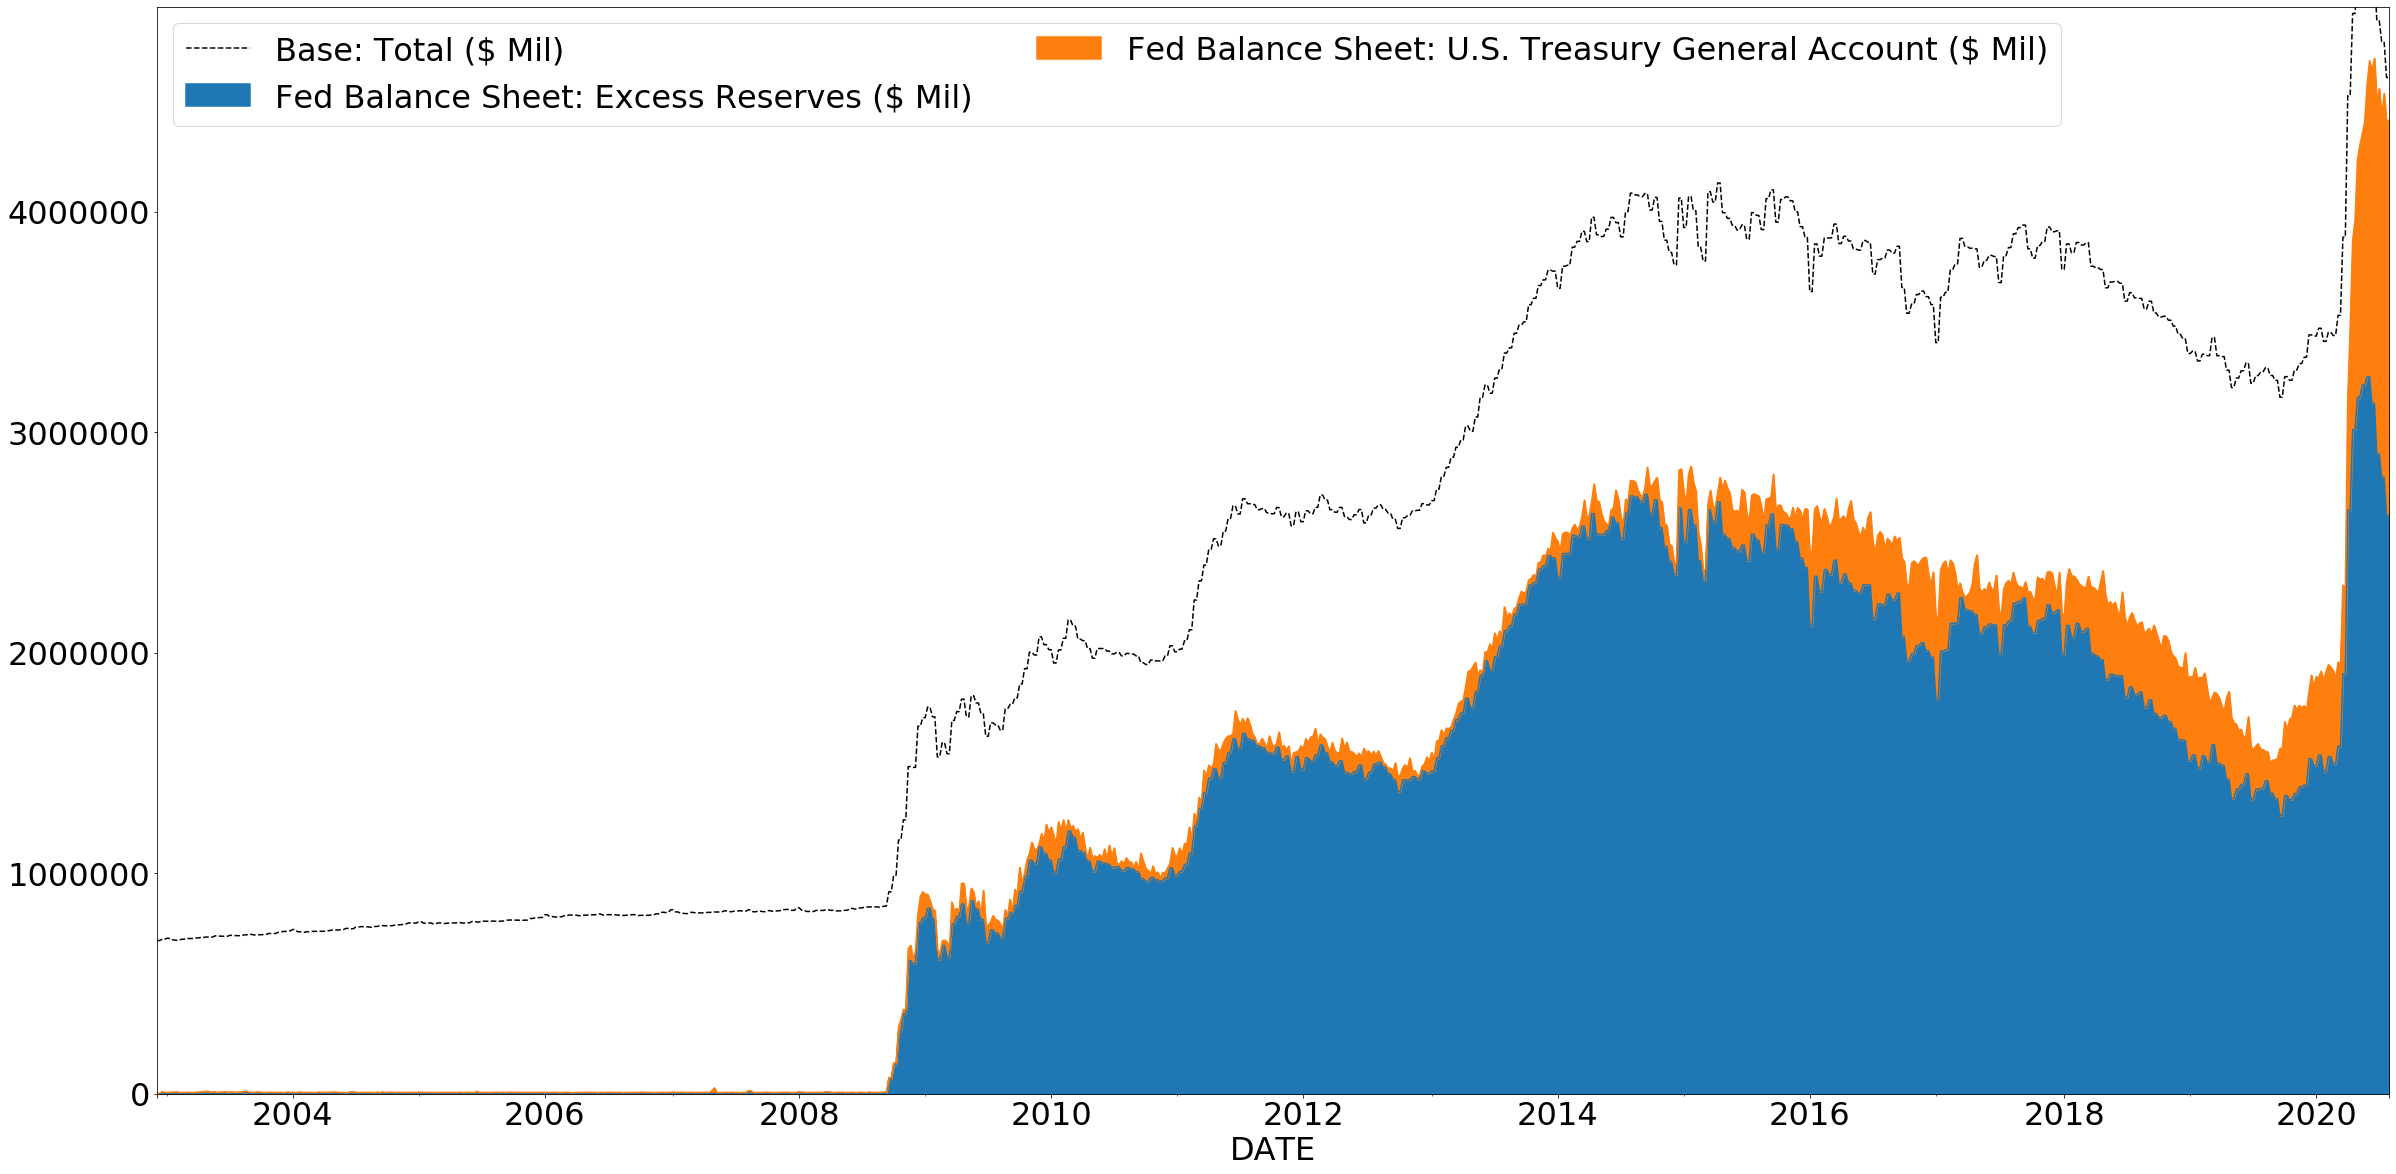

In [20]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet: Excess Reserves ($ Mil)",
            "Fed Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Base: Total ($ Mil)")

In a lecture at George Washington University, Federal Reserve Chariman Benjamin S. Bernanke explained that money was kept out of circulation by making sure that the means of payment took the form of an increase in the value of the recipients deposit account at the Federal Reserve. With reserve requirements at zero, now banks are able to increase their level of deposits so long as they find no investments that are more profitable. So it appeasr that the base circulates in the financial system and, instead of being held as required reserves, ultimately ends up back at the Fed collecting interest.

After the start of the COVID-19 economic crisis, nearly all base money is ultimately held at the Federal Reserve as either excess reserves or as part of the U.S. Treasury's General Account.

It appears not to be a coincidence that as reserve requirements moved to zero, the Treeasury General Account also increased to fill the gap between the total stock of base money and the value of excess reserves held at the Federal Reserve. This indicates  cooperation between the Federal Reserve and the U.S. Treasury that may play a role in allowing the Federal Reserve to moderate the velocity of the base money stock. At this point I can only speculate.

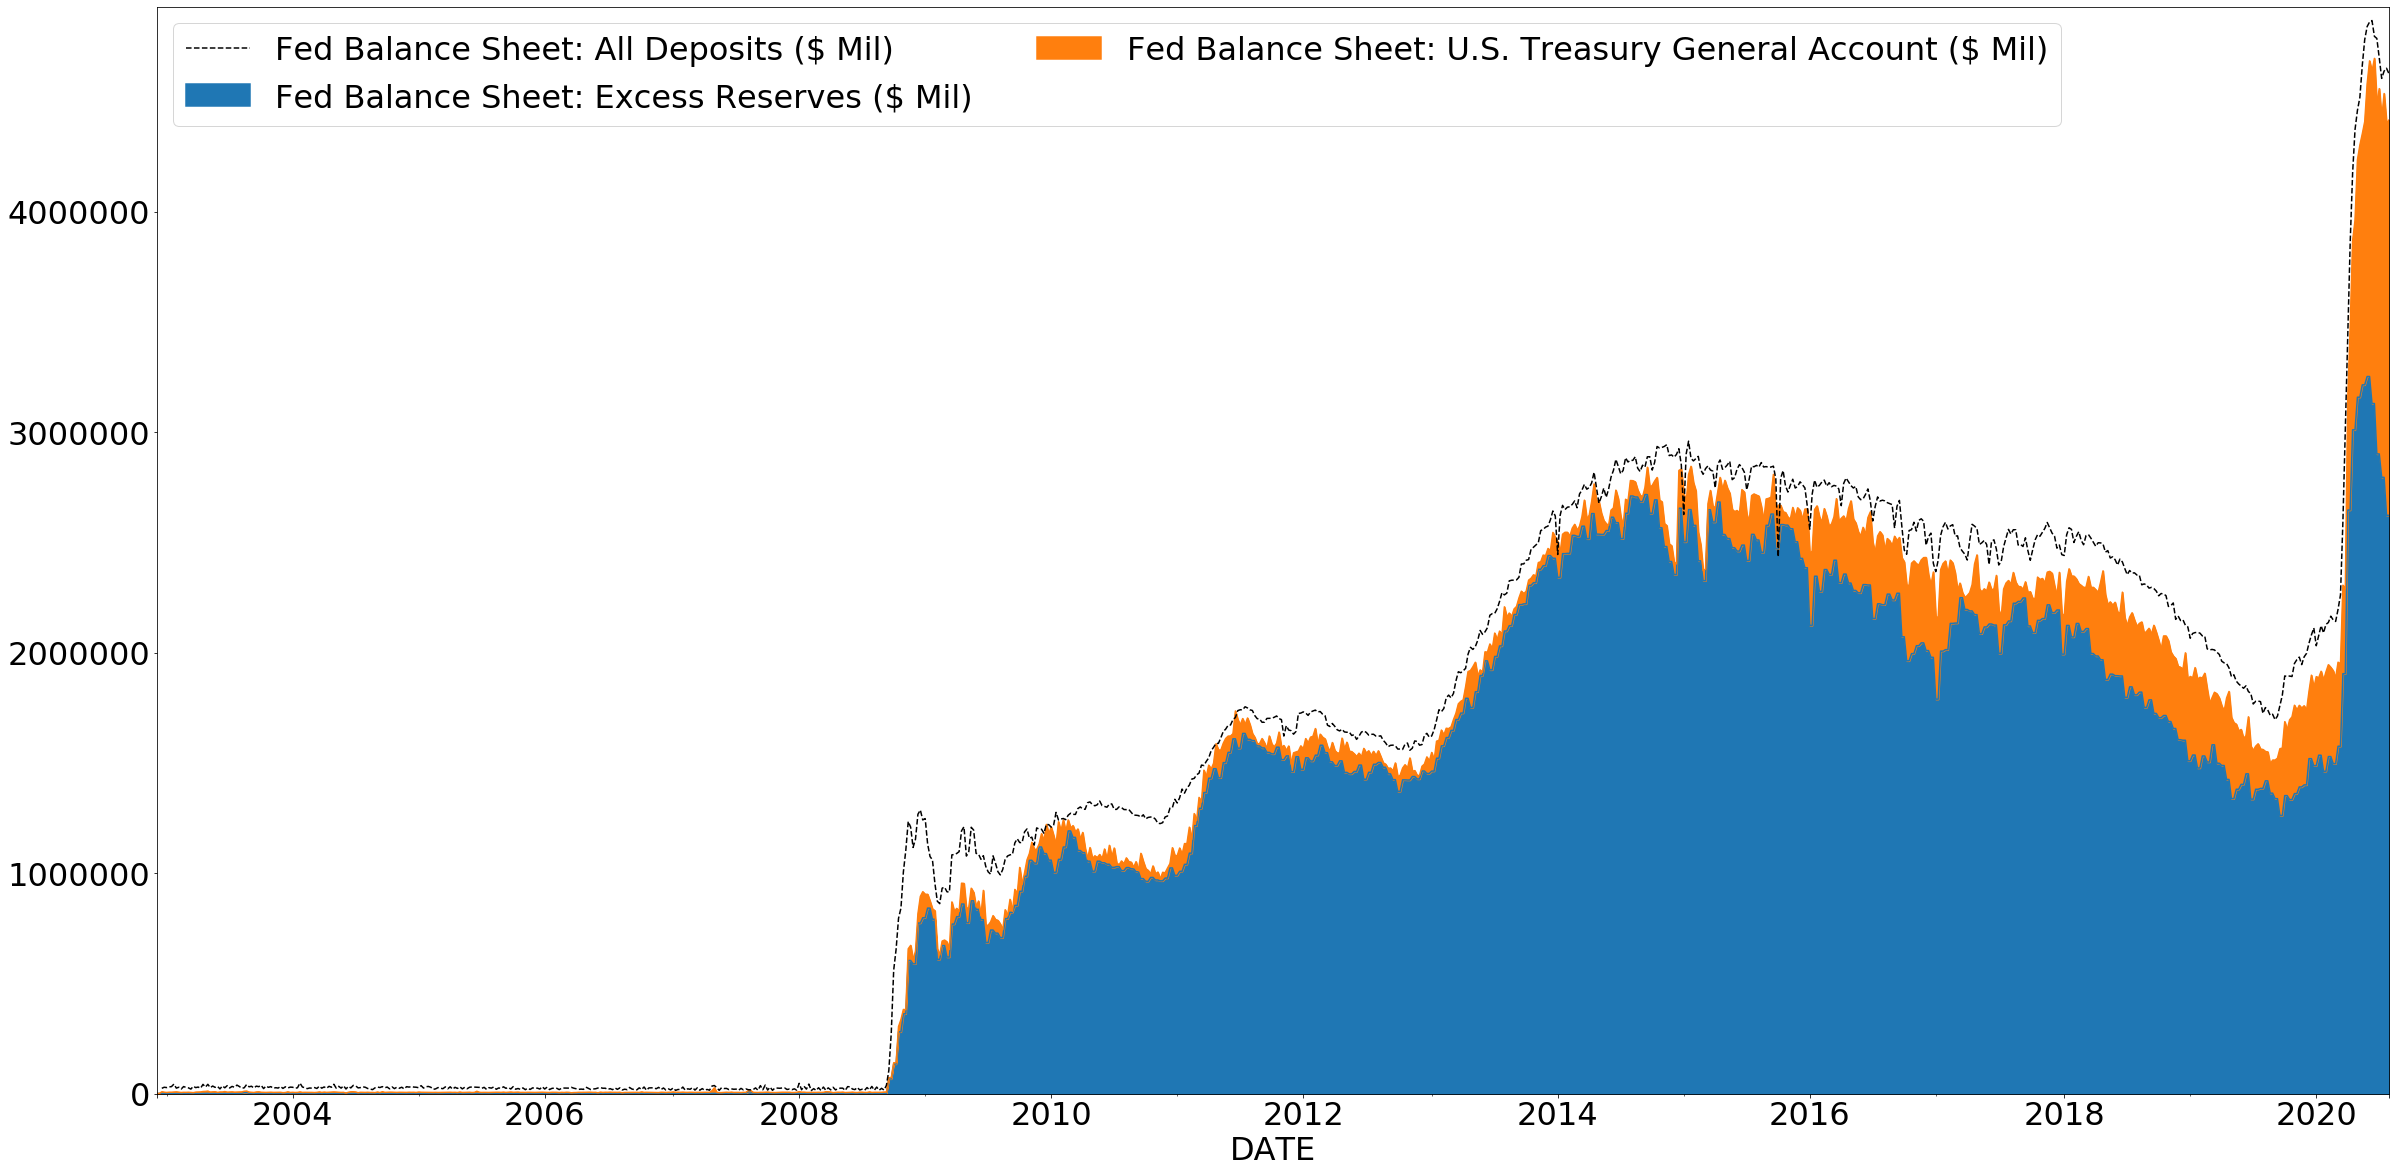

In [21]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet: Excess Reserves ($ Mil)",
              "Fed Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Fed Balance Sheet: All Deposits ($ Mil)")

Another way to conceptualize these two components of the liability side of the Fed's balance sheet is to compare them to the total level of deposits held at the Fed. So far, these two components have comprised that vast majority of deposits held at the Federal Reserve. And, together with Federal Reserve Outstanding, deposits comprise a significant portion of the liabilities side of the balance sheet. They are therefore a good indicator of monetary policy. 

## Overnight Lending and the Federal Funds Rate

If we include activity in the overnight lending market, taking the form of reverse repurchase agreements (reverse repos), we move a step closer to explaining the entire liabilities side of the balance sheet. 

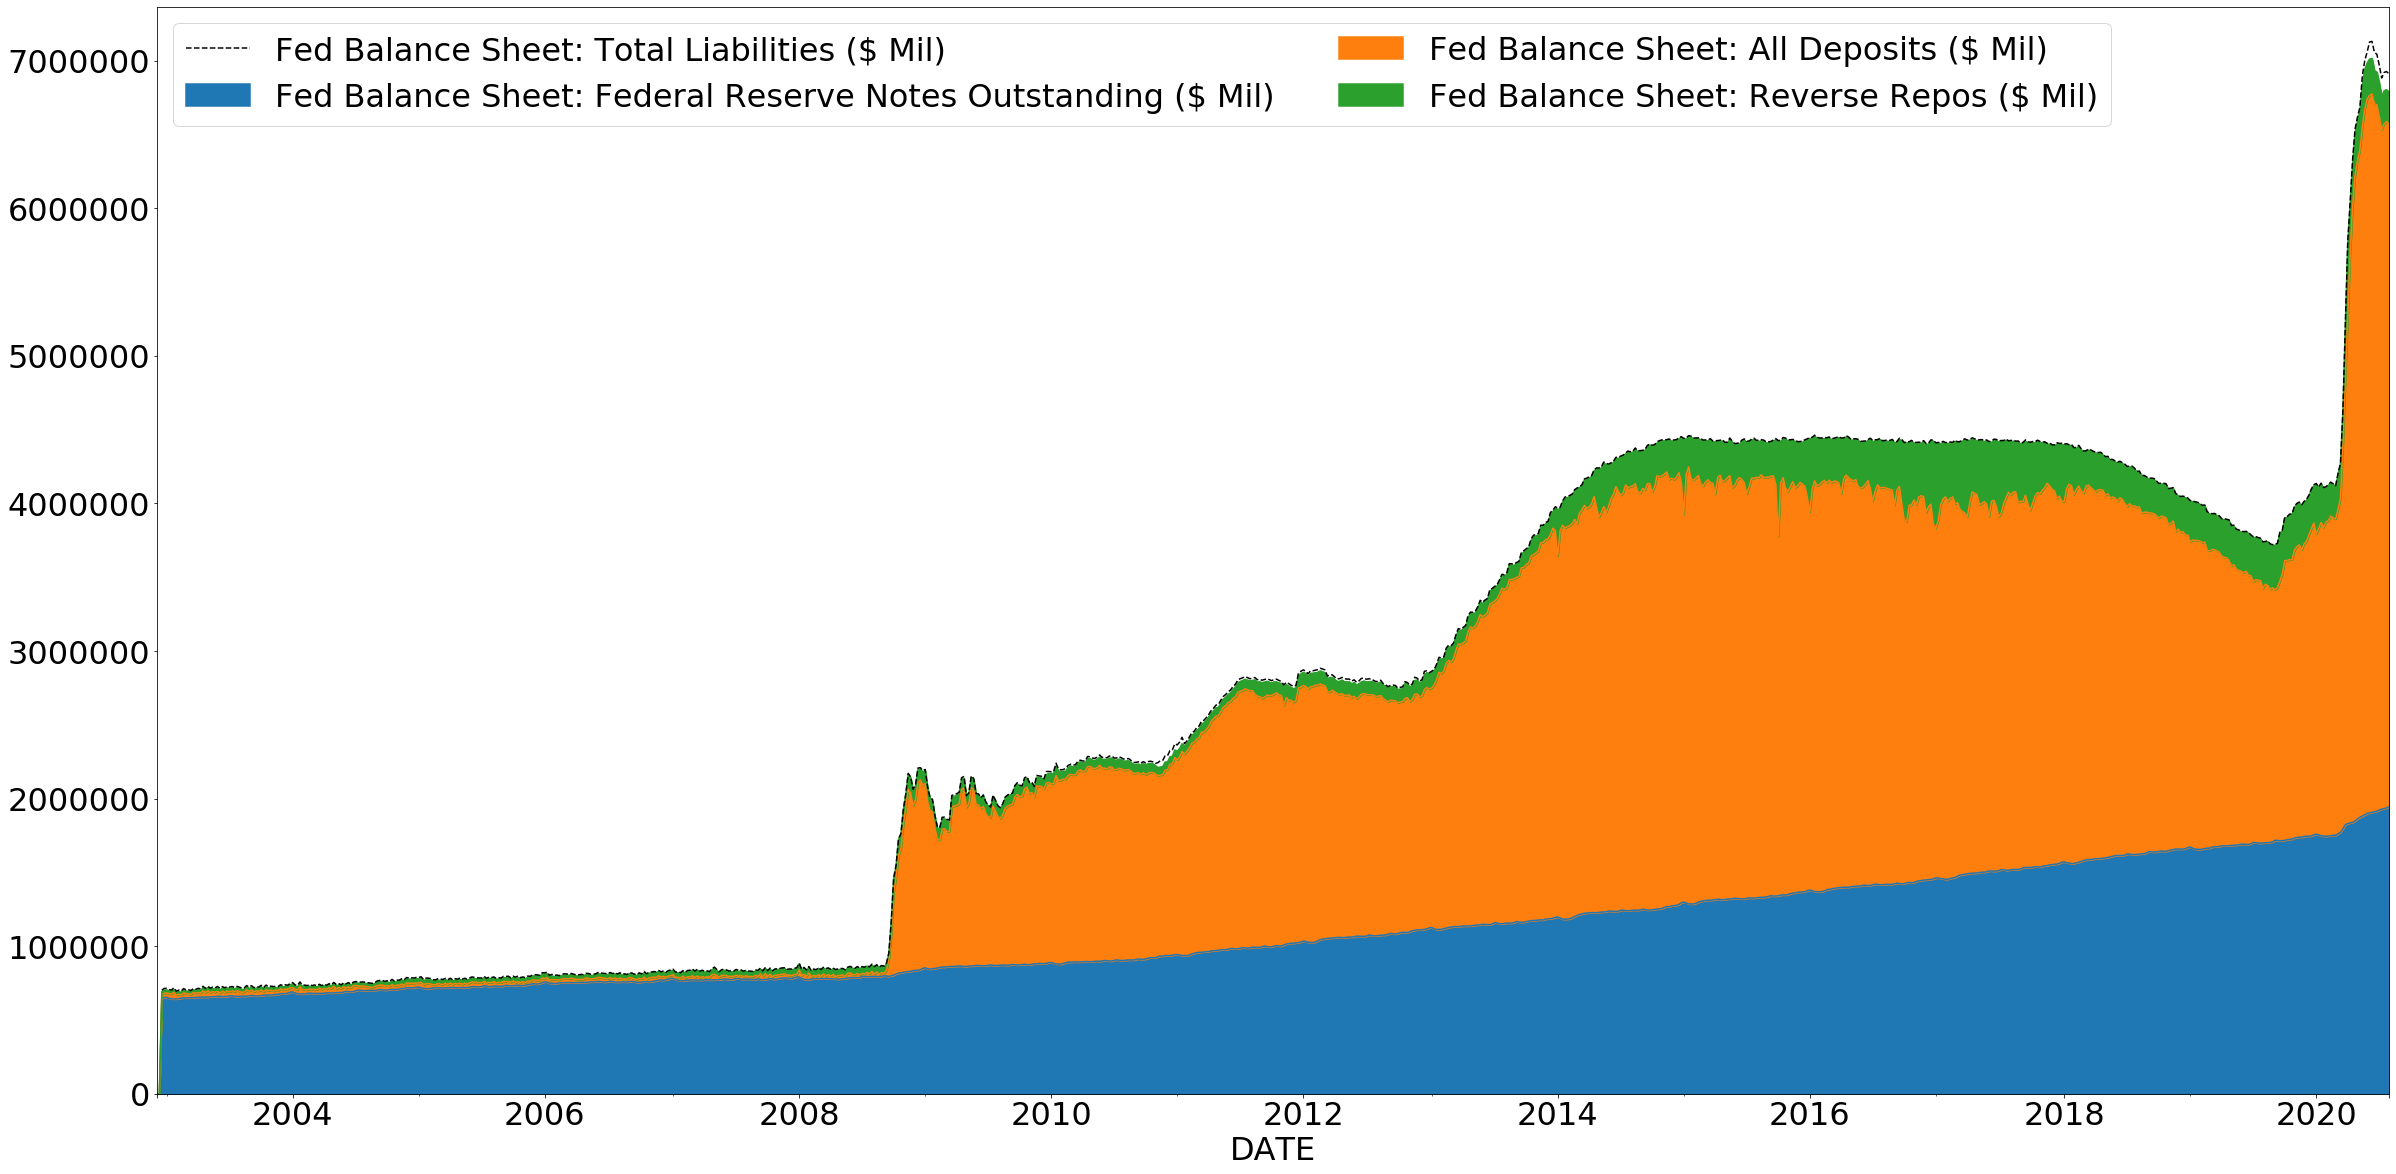

In [22]:
#fedProject
# . . . 
account_vars = ["Fed Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
              "Fed Balance Sheet: All Deposits ($ Mil)",
               "Fed Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Fed Balance Sheet: Total Liabilities ($ Mil)")

A fair portion of the Federal Reserve's balance sheet is dedicated to influencing the overnight lending market. The overnight lending market is comprised of lending between banks with the intention of temporarily buffering changes in reserve levels. Before reserve requirements were zero, lending in this market occurred primarily to allow banks to maintain minimum reserve requirements. After reserve requirements were moved to zero, lending volumes in this market fell significantly.  

The Federal Reserve has multiple means of influencing this market. In the most general terms, the Federal Reserve can either lend to or borrow from investors in the overnight lending market. It lends in this market by accumulating repos. It borrows in the market by creating reverse repos. Repurchase agreements are reflected on the asset side of the Federal Reserve's balance sheet whereas reverse repruchase agreements are reflected on the liability side of the balance sheet. The Federal Reserve does not record this activity as influencing the quantity of base money, likely because operations in this market are thought to be temporary.

A good way to conceptualize the Fed's operations in this market is to account for the net effect of it's holdings of repos and reverse repos. We can plot these two values together and also account for the net effect.

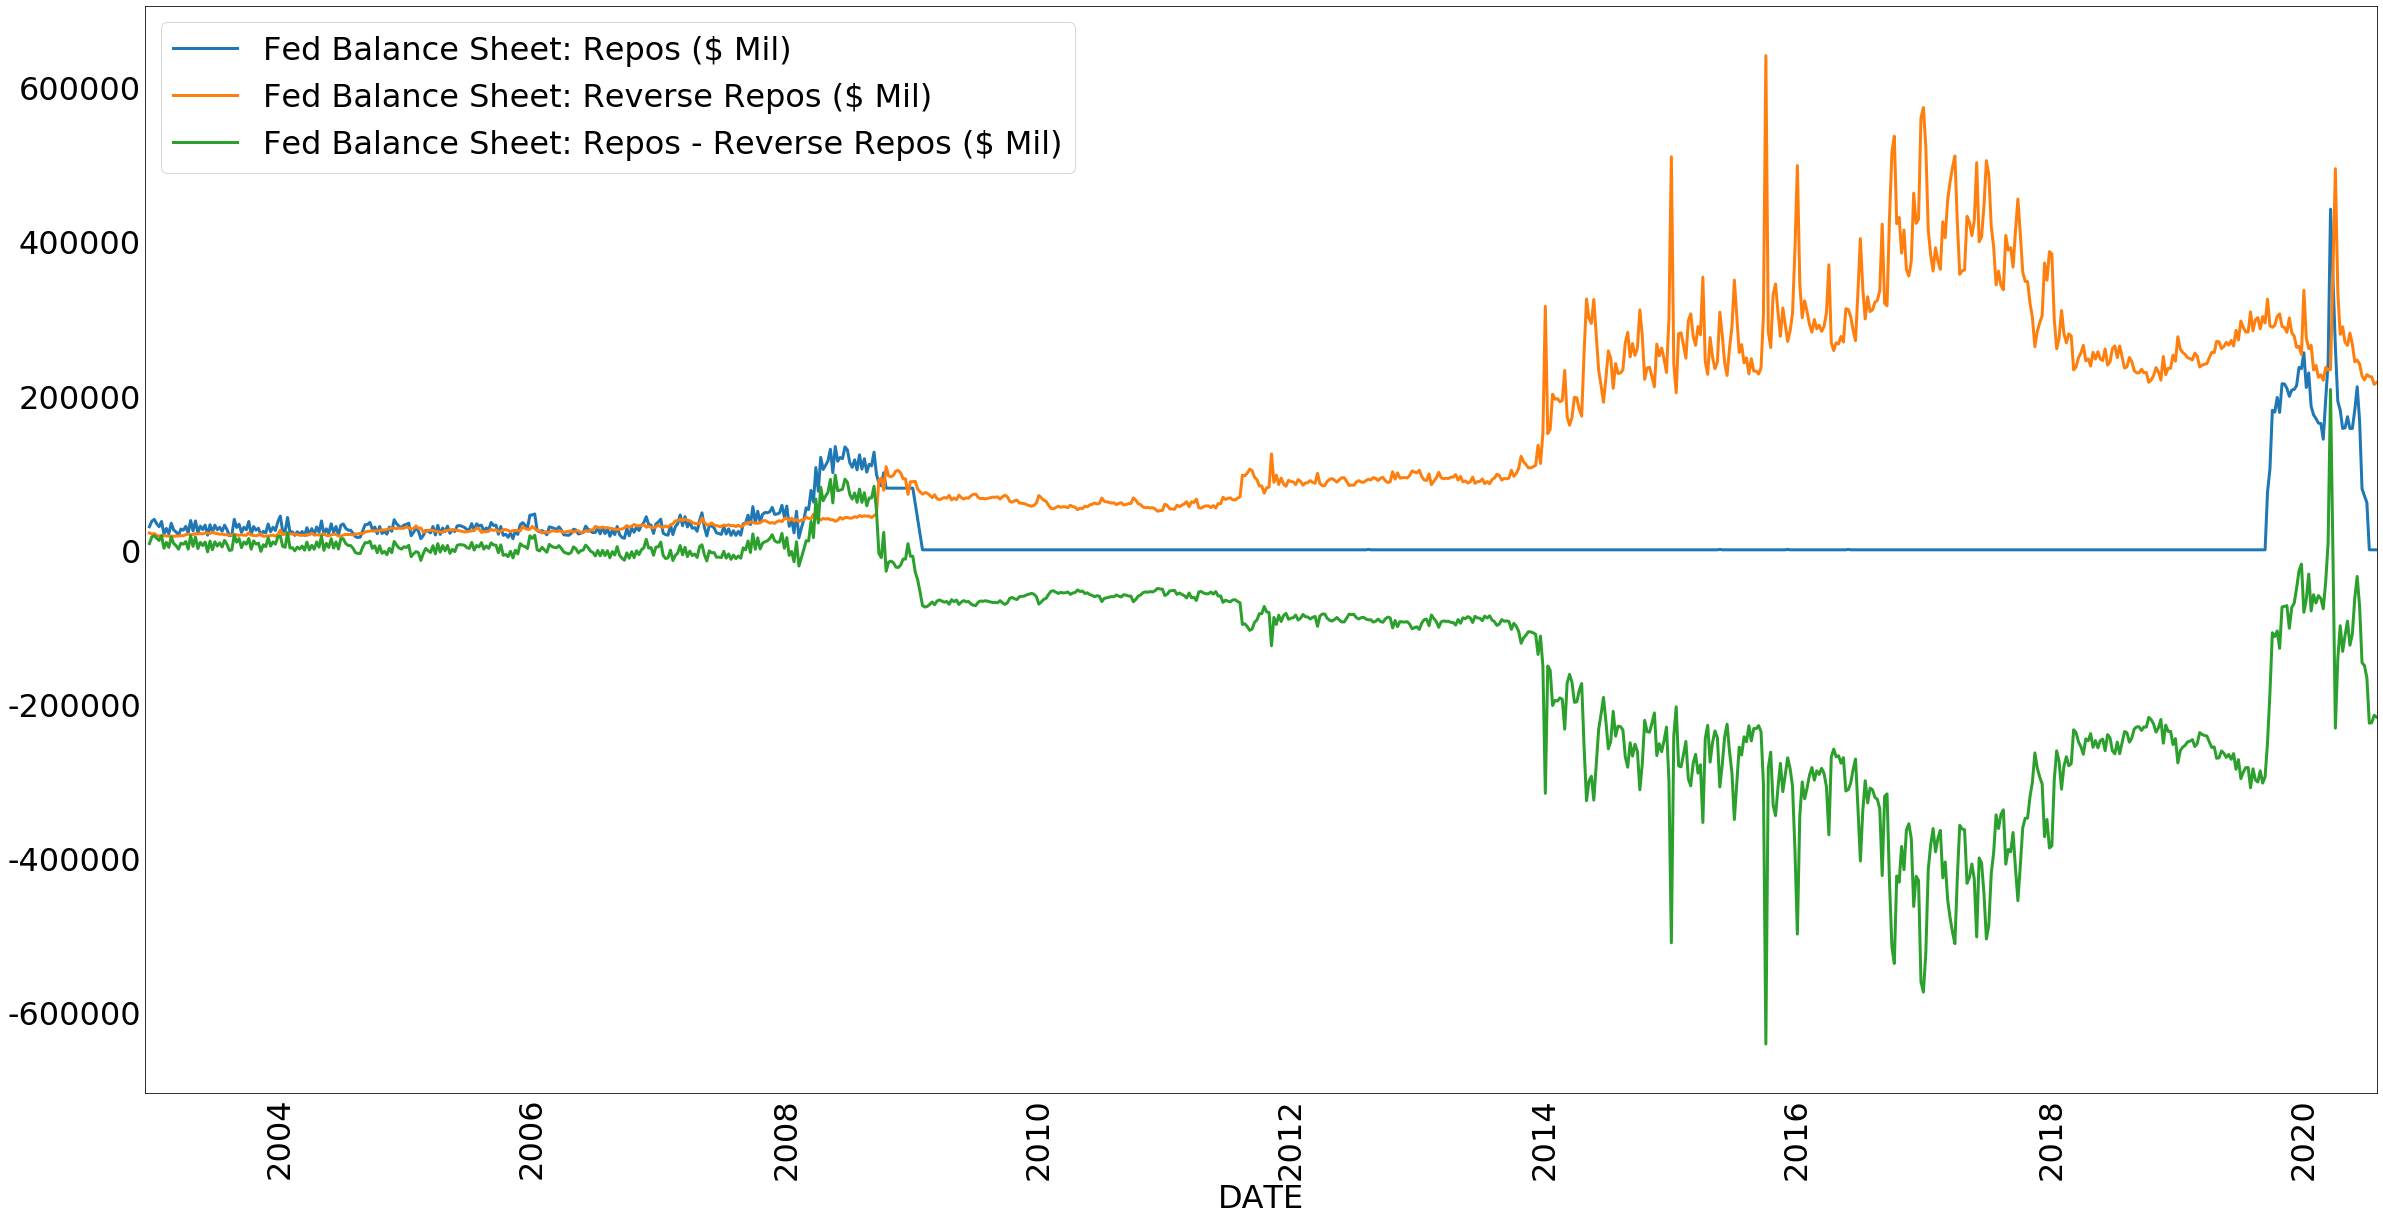

In [23]:
#fedProject.py
# . . . 
data["Fed Balance Sheet: Repos - Reverse Repos ($ Mil)"] = data["Fed Balance Sheet: Repos ($ Mil)"].sub(data["Fed Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Fed Balance Sheet: Repos ($ Mil)",
              "Fed Balance Sheet: Reverse Repos ($ Mil)",
             "Fed Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], linewidth = 3)

The Federal Reserve has been a net borrower in the overnight lending market. Since the value of its reverse repos is greater than the value of its repos, the overall effect of Fed operations in the overnight lending market has been to *decrease* the quantity of funds available to investors in that market.

## Federal Funds Rate, Interest on Excess Reserves, and Federal Reserve Influence over Interest Rates

The overnight lending market plays a key role in the setting of monetary policy by Federal Reserve. Monetary policy is typically enacted by the setting of interest rate targets. The Federal Reserves does not independently target different interest rates. Rather, it targets one rate and then may attempt to marginally influence other interest rates. 

The Fed attempts to influence the risk free rate of interest. Before the financial crisis of 2008, the risk free rate was thought to be the rate paid on short-term sovereign bonds (e.g., U.S. Treasuries). A similar approximation of the risk free rate is provided by the federal funds rate, the rate charged for overnight lending between banks. Except under extraordinary circumstance, as occurred when interbank lending slowed to a near halt in 2008, an overnight loan is expected to be able to be repaid by the borrowing bank without any difficulty. For this reason, the Federal Reserve 1) targets the federal funds rate and 2) attempts to maintain stability in the overnight lending market. We can think of the overnight lending and short-term U.S. Treasuries as near-perfect substitutes. 

In 2008, the Federal Reserve add a relevant alternative to these two instruments: deposit accounts that pay interest on excess reserves. Since the Federal Reserve is not at risk of going bankrupt, payment of interest on excess reserves is a true risk-free rate for investors, so long as interest rates are believed to compensate for costs from expected future inflation.

For nearly a decade, the Federal Reserve set the rate paid on excess reserves equal to federal funds rate. This made interest bearing deposit accounts at the Fed clearly superior to investment in the overnight lending market. More recently, this rate has moved marginally below the overnight lending rate. The difference between these since mid 2018 has been between 5 and 15 basis points (between .05 and .15).

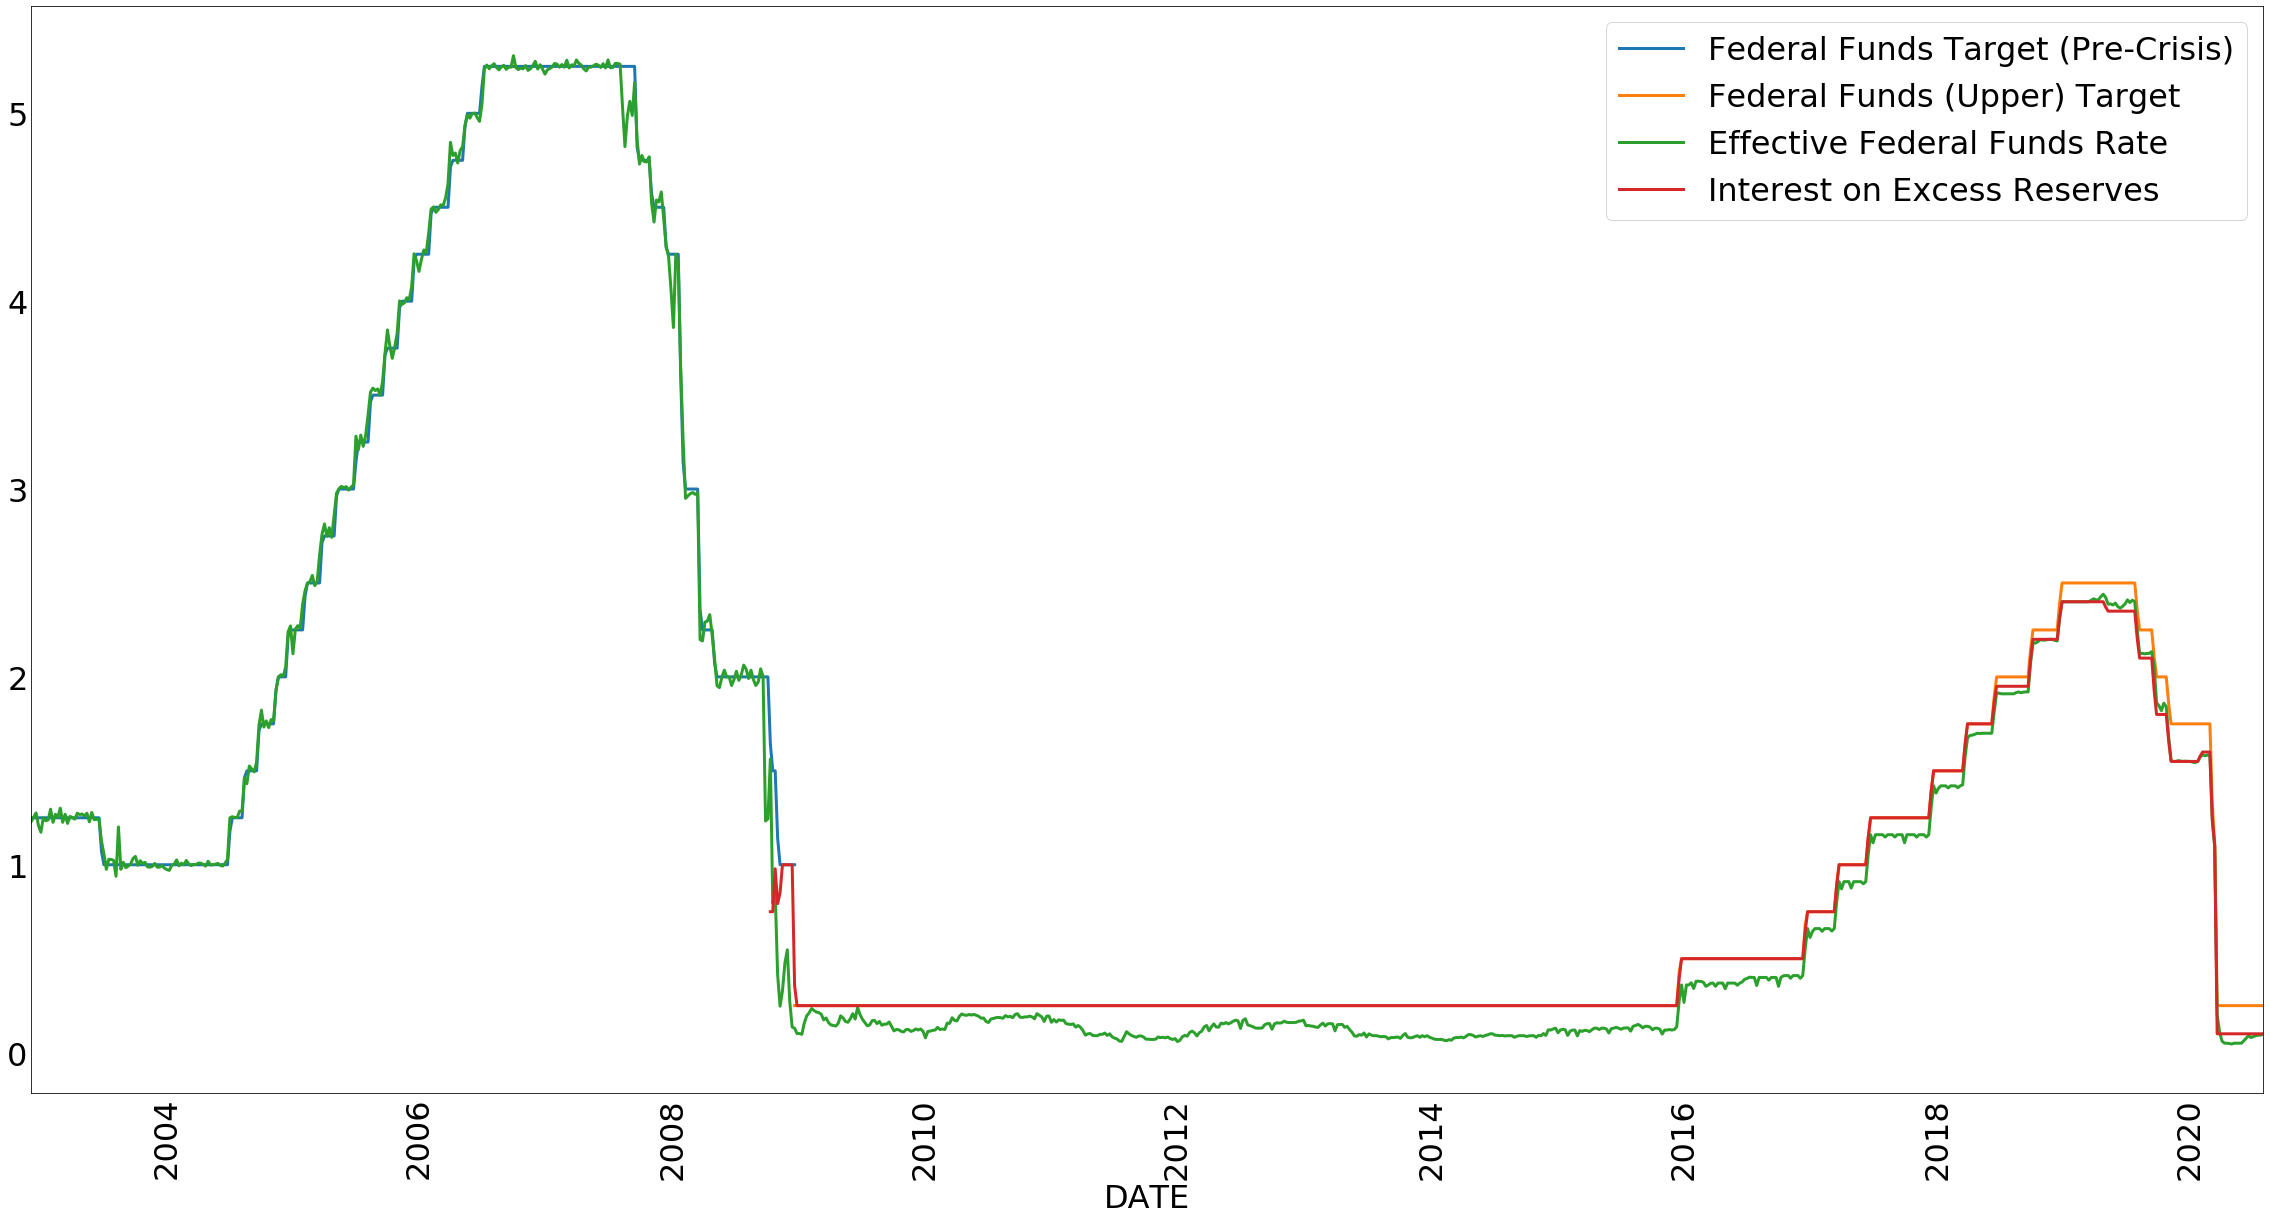

In [24]:
#fedProject.py
# . . . 
data["Fed Balance Sheet: Repos - Reverse Repos ($ Mil)"] = data["Fed Balance Sheet: Repos ($ Mil)"].sub(data["Fed Balance Sheet: Reverse Repos ($ Mil)"])
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]

plot_lines(data[interest_vars], linewidth = 3)                

From early 2009 to mid 2018, banks had little incentive to lend overnight to one another since the rate paid on excess reserves was actually higher than the effective federal funds rate. After the Federal Reserve lowered the rate paid on excess reserves relative to the upper federal funds target, the effective federal funds rate has tended to be higher or at least equal to the rate paid on excess reserves. With the onset of the COVID-19 policy response, the federal funds rate briefly moved below the rate paid on excess reserves, but has again returned to equality with it.

# Conclusion

Having created a script for downloading and visualizing data from the Federal Reserve, you are in a position to better understand how monetary policy works. Before 2008, monetary policy might have been summed up by reference to only a few policy tools:

1. setting of the discount window (i.e., direct lending by the central bank)
2. open market operations (i.e., purchases and sales of sovereign debt)
3. setting ofthe  required reserve ratio
4. targeting of interest rates

All of these elements still play a role in monetary policy. Now, they interact with a much larger set of strategies and financial instruments and facilities. 

This lesson has simplified monetary policy, viewing all operations as amounting to:
1. loans from the central bank to the market
2. borrowing from the central bank, often in the form of deposit accounts
3. targeting of interest rates by adjusting rates of interest paid to depositors and through operations in the overnight lending market

Furthermore, the increase in the variety of instruments held by the Federal Reserve has allowed it to target particular markets, namely, the home mortgage market in the U.S.. The expansion of the Federal Reserve's balance sheet has also allowed it to significantly increase its support of Federal borrowing. In the process, its ability and willingnes to cooeprate with the U.S. Treasury has greatly increased since the policy regime change that occurred starting in 2008.